In [67]:
##Import lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
# import Scilearn lib https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
#from sklearn.metrics import accuracy_score,confusion_matrix


from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples, calinski_harabasz_score



import warnings
warnings.filterwarnings("ignore")


#df1 = pd.read_csv('Final_out_vowels.csv')
#df1 = pd.read_csv('Final_out_consonants.csv')


#df1 = pd.read_csv('Final_1_vowels.csv')
#df1 = pd.read_csv('Final001_consonants.csv')

#df1 = pd.read_csv('Final_out_002_vowels.csv')

#df1 = pd.read_csv('best_frames_kasun_vowel.csv')
#df1 = pd.read_csv('best_frames_kasun_total.csv')
df1 = pd.read_csv('best_frames_kasun_consonant.csv')

df1.head()


Phoneme ID    Time  Image No  w to h ratio     ang 1     ang 2     ang 3  \
0           1  72.250      4335      1.478951  0.947847  0.549372  0.252869   
1           2  79.700      4782      1.341410  1.038548  0.603362  0.283820   
2           3  87.367      5242      1.561866  0.985131  0.566438  0.261626   
3           4  90.633      5438      1.588544  0.961847  0.521319  0.242461   
4           5  97.700      5862      1.692170  0.937615  0.524681  0.250722   

    area 1   area 2   area 3       area 4  
0  13676.0  13079.0  18925.5  21488.96596  
1  14488.5  14678.0  20642.5  22770.17559  
2  11820.0  11249.5  16314.0  18569.57762  
3  13636.0  13303.0  19061.5  21421.96721  
4  12186.0  11917.0  17054.5  19143.31262

In [68]:
#Here, we will take only two features each feature from the dataset just to make it easy to visualize the steps.


D1 = input()
D2 = input()
D3 = input()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df1[[D1]])
df1[D1] = scaler.transform(df1[[D1]])

scaler.fit(df1[[D2]])
df1[D2] = scaler.transform(df1[[D2]])

scaler.fit(df1[[D3]])
df1[D3] = scaler.transform(df1[[D3]])


df = df1[[D1,D2,D3]]

df.head()



w to h ratio
ang 2
area 3


w to h ratio     ang 2    area 3
0      0.045137  0.803165  0.884687
1      0.000000  0.935909  0.998804
2      0.072347  0.845125  0.711119
3      0.081102  0.734190  0.893726
4      0.115109  0.742457  0.760335

In [69]:
df.describe()

w to h ratio      ang 2     area 3
count     26.000000  26.000000  26.000000
mean       0.195171   0.692093   0.647833
std        0.244597   0.283899   0.312519
min        0.000000   0.000000   0.000000
25%        0.057409   0.599911   0.526701
50%        0.094121   0.817784   0.745098
75%        0.183318   0.889352   0.873588
max        1.000000   1.000000   1.000000

In [70]:
glob_mean = []
df.mean()
glob_mean.append(df.mean())
print(glob_mean)

[w to h ratio    0.195171
ang 2           0.692093
area 3          0.647833
dtype: float64]


In [71]:
#https://miamioh.instructure.com/courses/38817/pages/data-cleaning

# Data Cleaning

#Checking for Null Values
df.isnull().sum()

w to h ratio    0
ang 2           0
area 3          0
dtype: int64

In [2]:
'''
Max_numclusters = int(input('Max number of clusters:'))


#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

#Instantiate the clustering model and visualizer 
#automatically find the “elbow” which likely corresponds to the optimal value of k using the “knee point detection algorithm”.

from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,Max_numclusters),metric='distortion', timings=False, locate_elbow=True )

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

visualizer.show(outpath="1.png")
visualizer.show(outpath=str(D1)+','+str(D2)+','+str(D3)+'_elbow_curve'+'.png')
visualizer.show()
'''

'\nMax_numclusters = int(input(\'Max number of clusters:\'))\n\n\n#https://www.scikit-yb.org/en/latest/api/cluster/elbow.html\n\n#Instantiate the clustering model and visualizer \n#automatically find the “elbow” which likely corresponds to the optimal value of k using the “knee point detection algorithm”.\n\nfrom yellowbrick.cluster import KElbowVisualizer\n\nmodel = KMeans()\nvisualizer = KElbowVisualizer(model, k=(1,Max_numclusters),metric=\'distortion\', timings=False, locate_elbow=True )\n\nvisualizer.fit(df)        # Fit the data to the visualizer\nvisualizer.show() # Finalize and render the figure\n\nvisualizer.show(outpath="1.png")\nvisualizer.show(outpath=str(D1)+\',\'+str(D2)+\',\'+str(D3)+\'_elbow_curve\'+\'.png\')\nvisualizer.show()\n'

Min num of Clusters:2
Max Num of Clusters:18
Clustered_3D_K_2=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1]
Clustered_3D_K_3=[0 0 0 0 0 2 2 0 0 0 0 0 0 2 1 1 1 1 2 0 0 2 0 2 0 1]
Clustered_3D_K_4=[1 1 1 1 2 2 2 1 1 1 1 1 1 2 0 0 0 0 2 1 1 3 1 2 1 0]
Clustered_3D_K_5=[2 2 2 2 0 0 0 2 2 2 2 2 2 0 3 3 3 3 0 2 2 4 2 0 2 1]
Clustered_3D_K_6=[4 4 2 4 0 0 0 2 4 2 4 2 4 0 1 1 1 1 0 2 2 3 4 0 2 5]
Clustered_3D_K_7=[4 4 1 4 2 2 2 1 4 1 4 1 4 2 0 6 0 6 2 1 1 5 4 2 1 3]
Clustered_3D_K_8=[1 1 6 1 6 6 2 6 1 5 1 6 1 2 3 0 3 0 2 5 5 4 1 2 5 7]
Clustered_3D_K_9=[2 2 1 2 1 5 5 1 2 7 2 1 2 3 0 8 0 8 5 7 7 6 2 5 7 4]
Clustered_3D_K_10=[3 3 9 5 5 5 7 9 3 2 3 9 3 0 1 4 1 4 7 2 2 8 3 7 2 6]
Clustered_3D_K_11=[10  0  2 10  9  9  3  2  0  7  7  2  0  8  6  1  6  1  3  7  7  5  0  3
  2  4]
Clustered_3D_K_12=[ 0 11  2  0  7  7  3  2 11  5  5  2 11 10  1  8  9  8  3  5  5  6 11  3
  2  4]
Clustered_3D_K_13=[ 3  9  7  3 10 10  5  7  9  0  0  7  9  2 11 12  6  1  5  0  0  8  9  5
  7  4]
Clustered_3D_K_14=

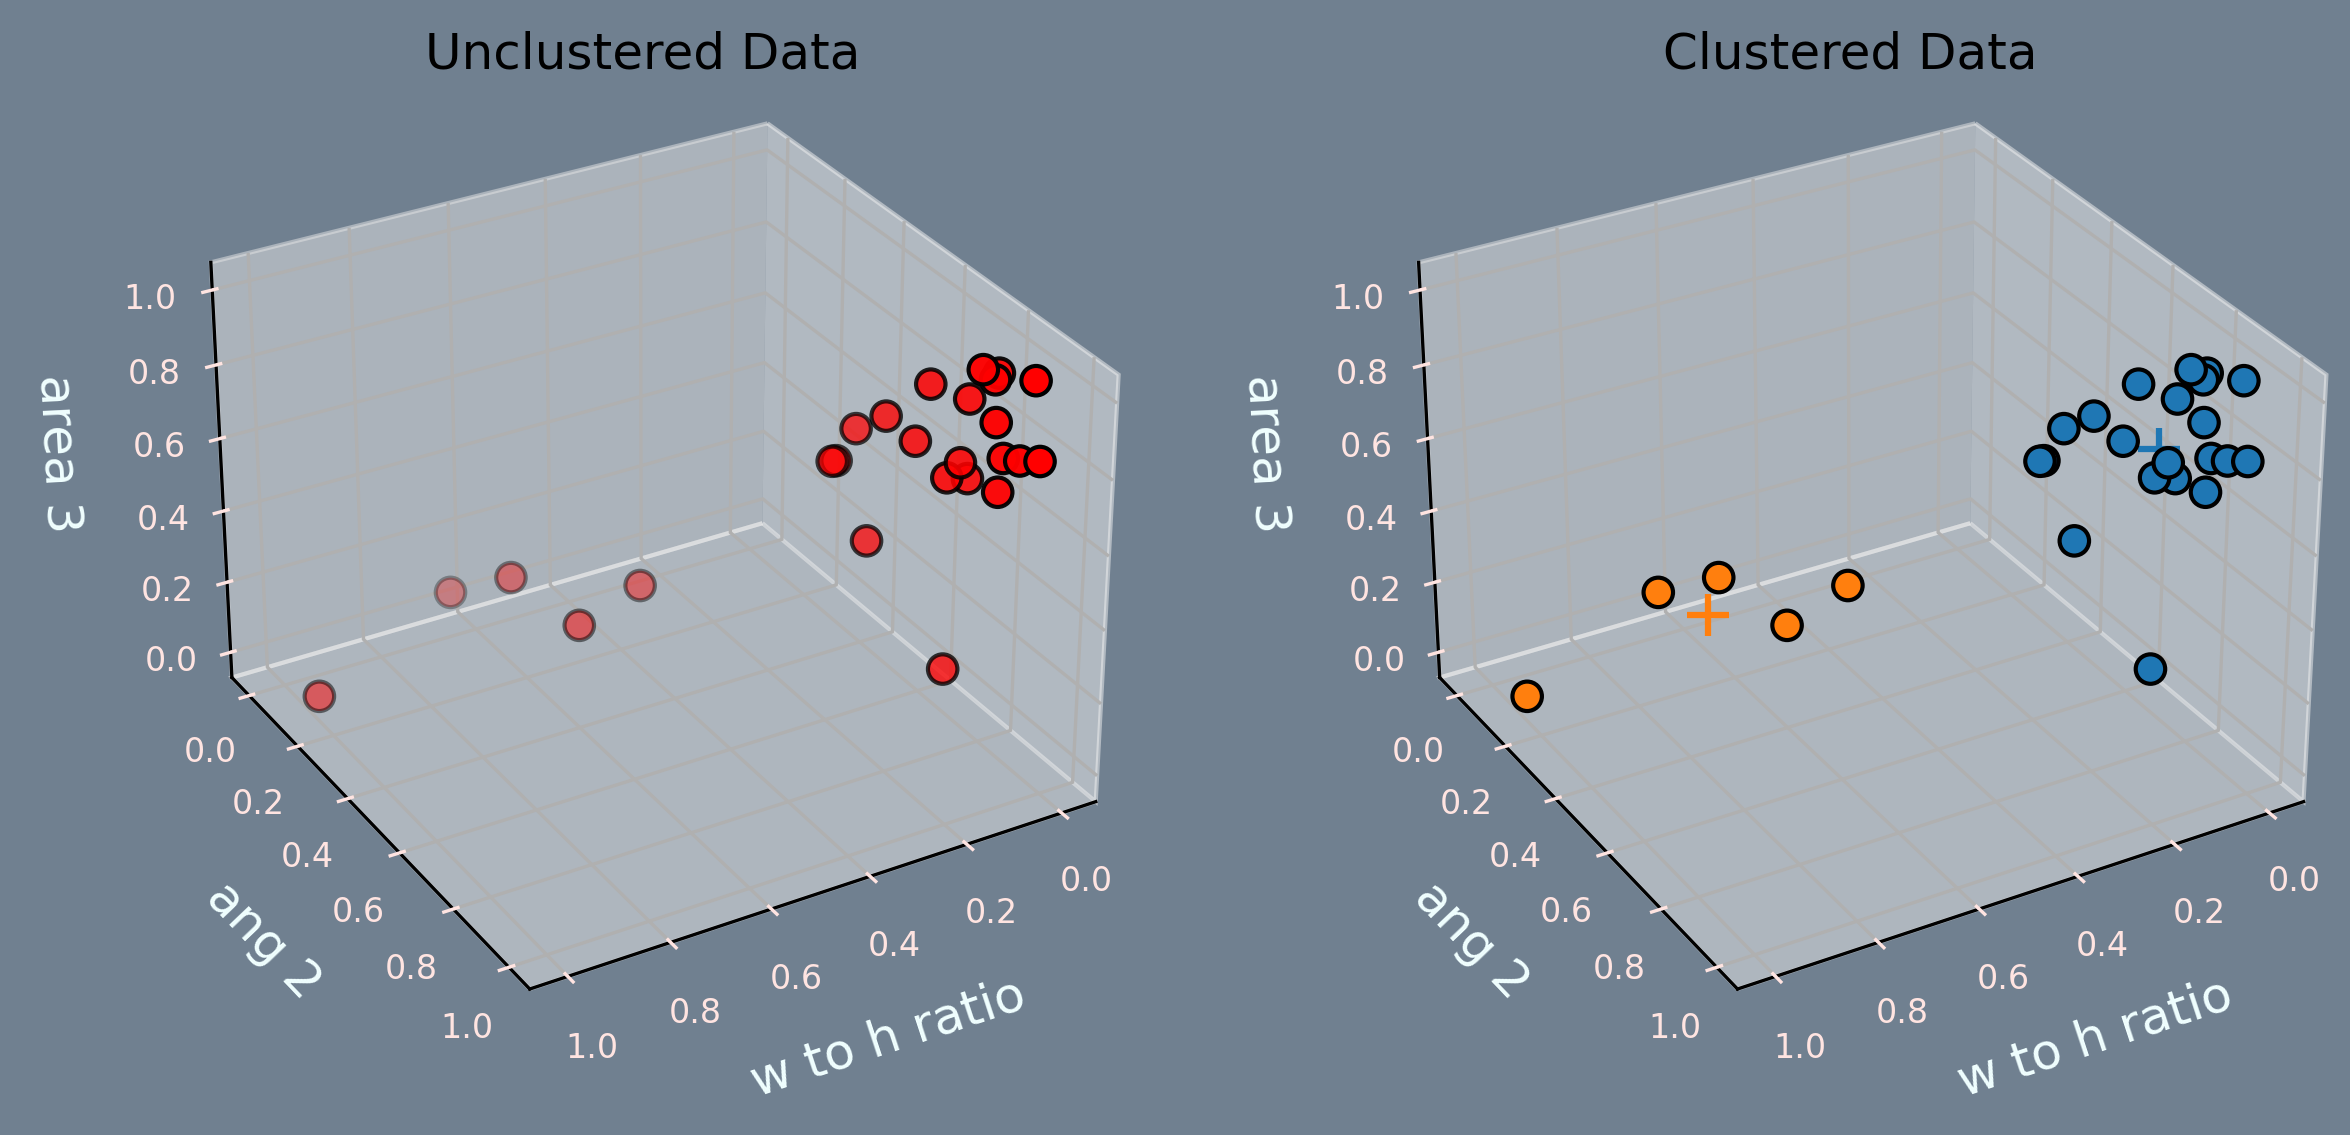

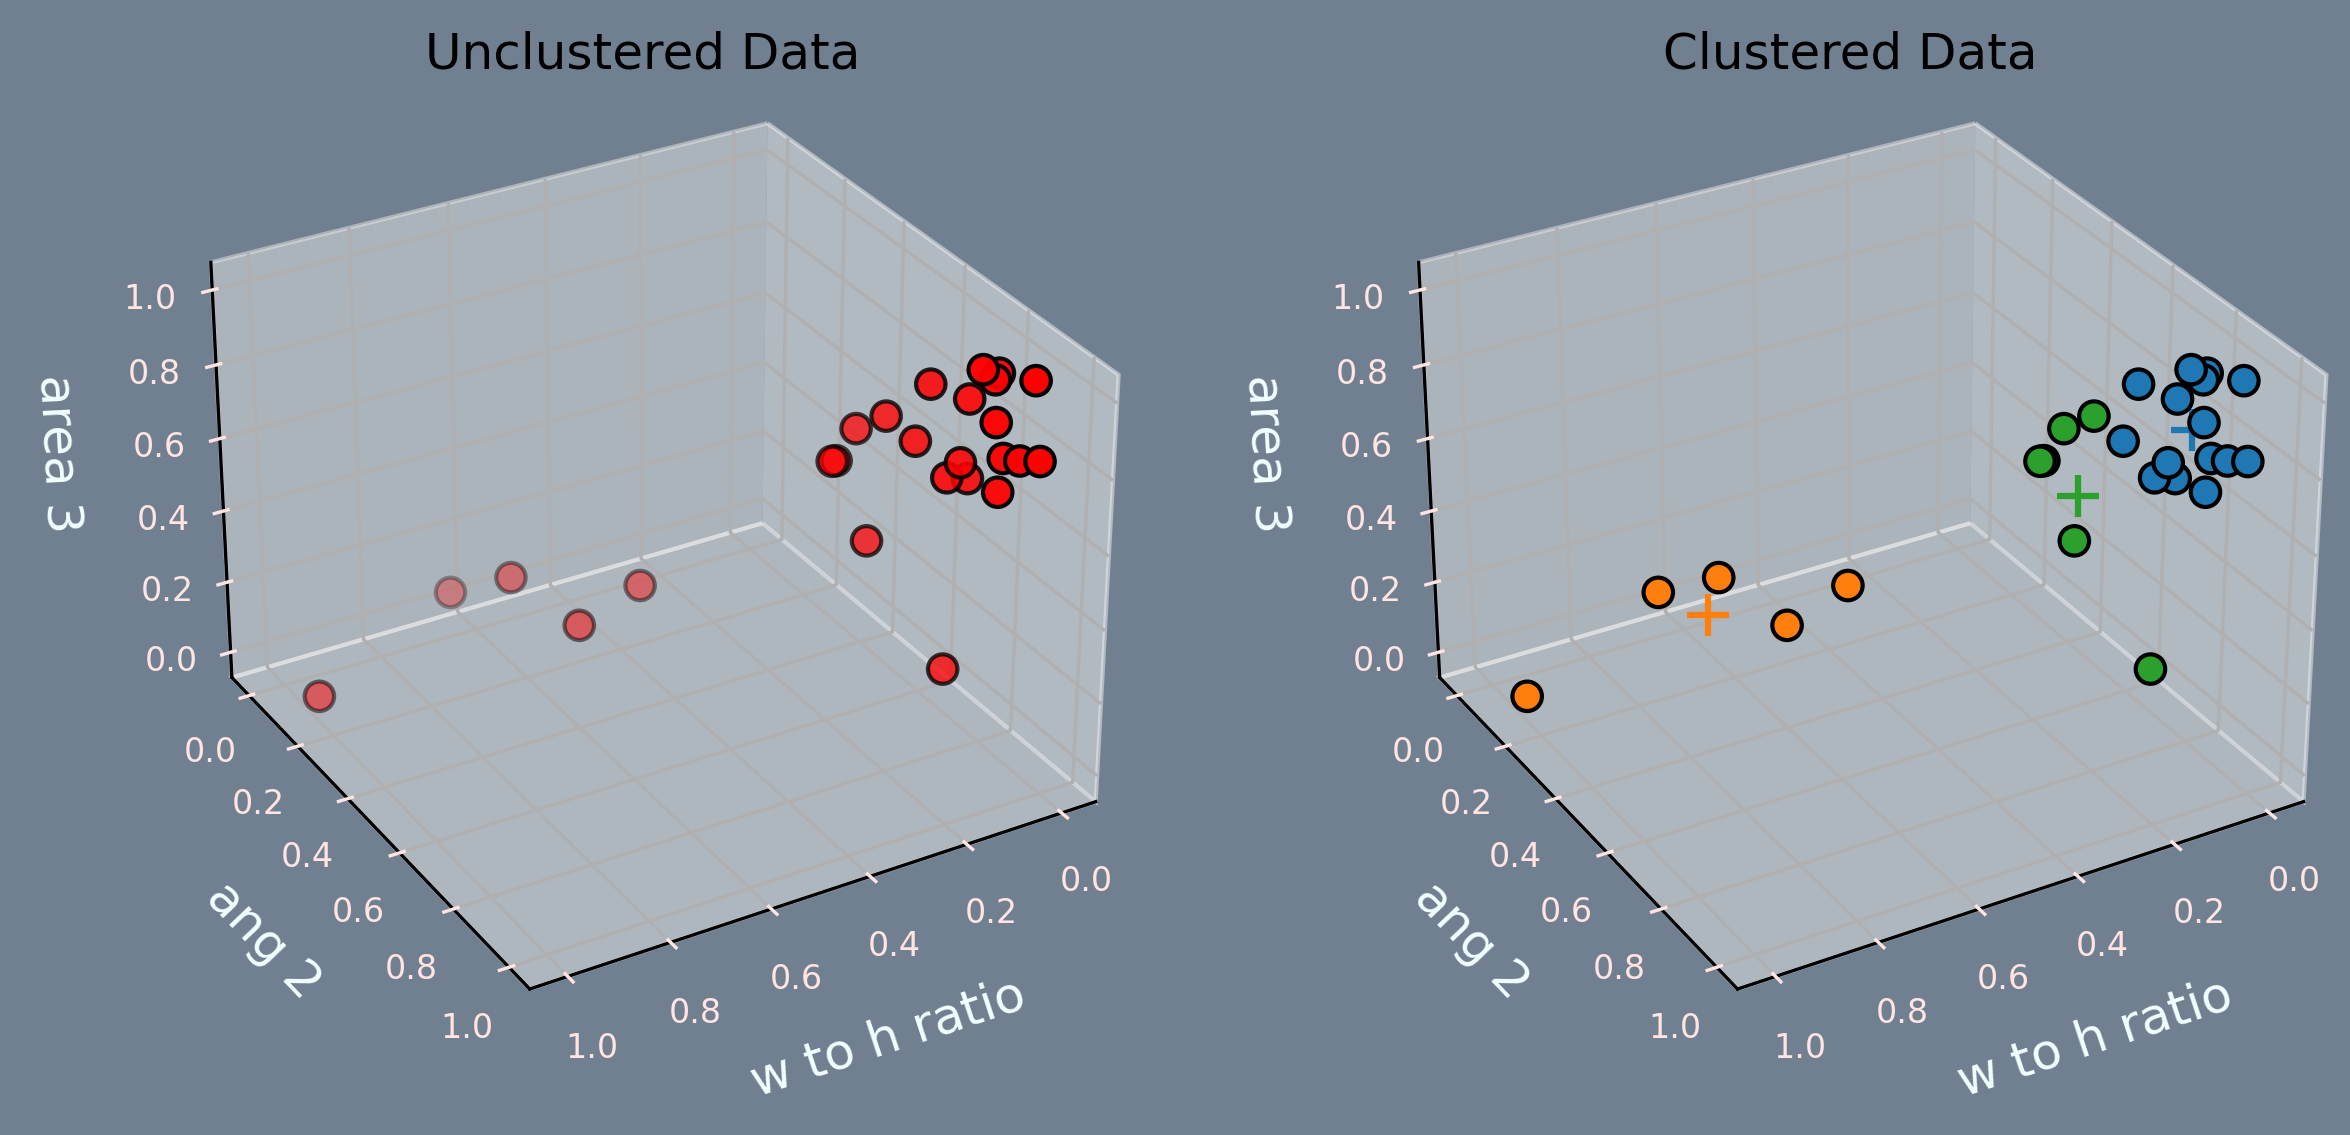

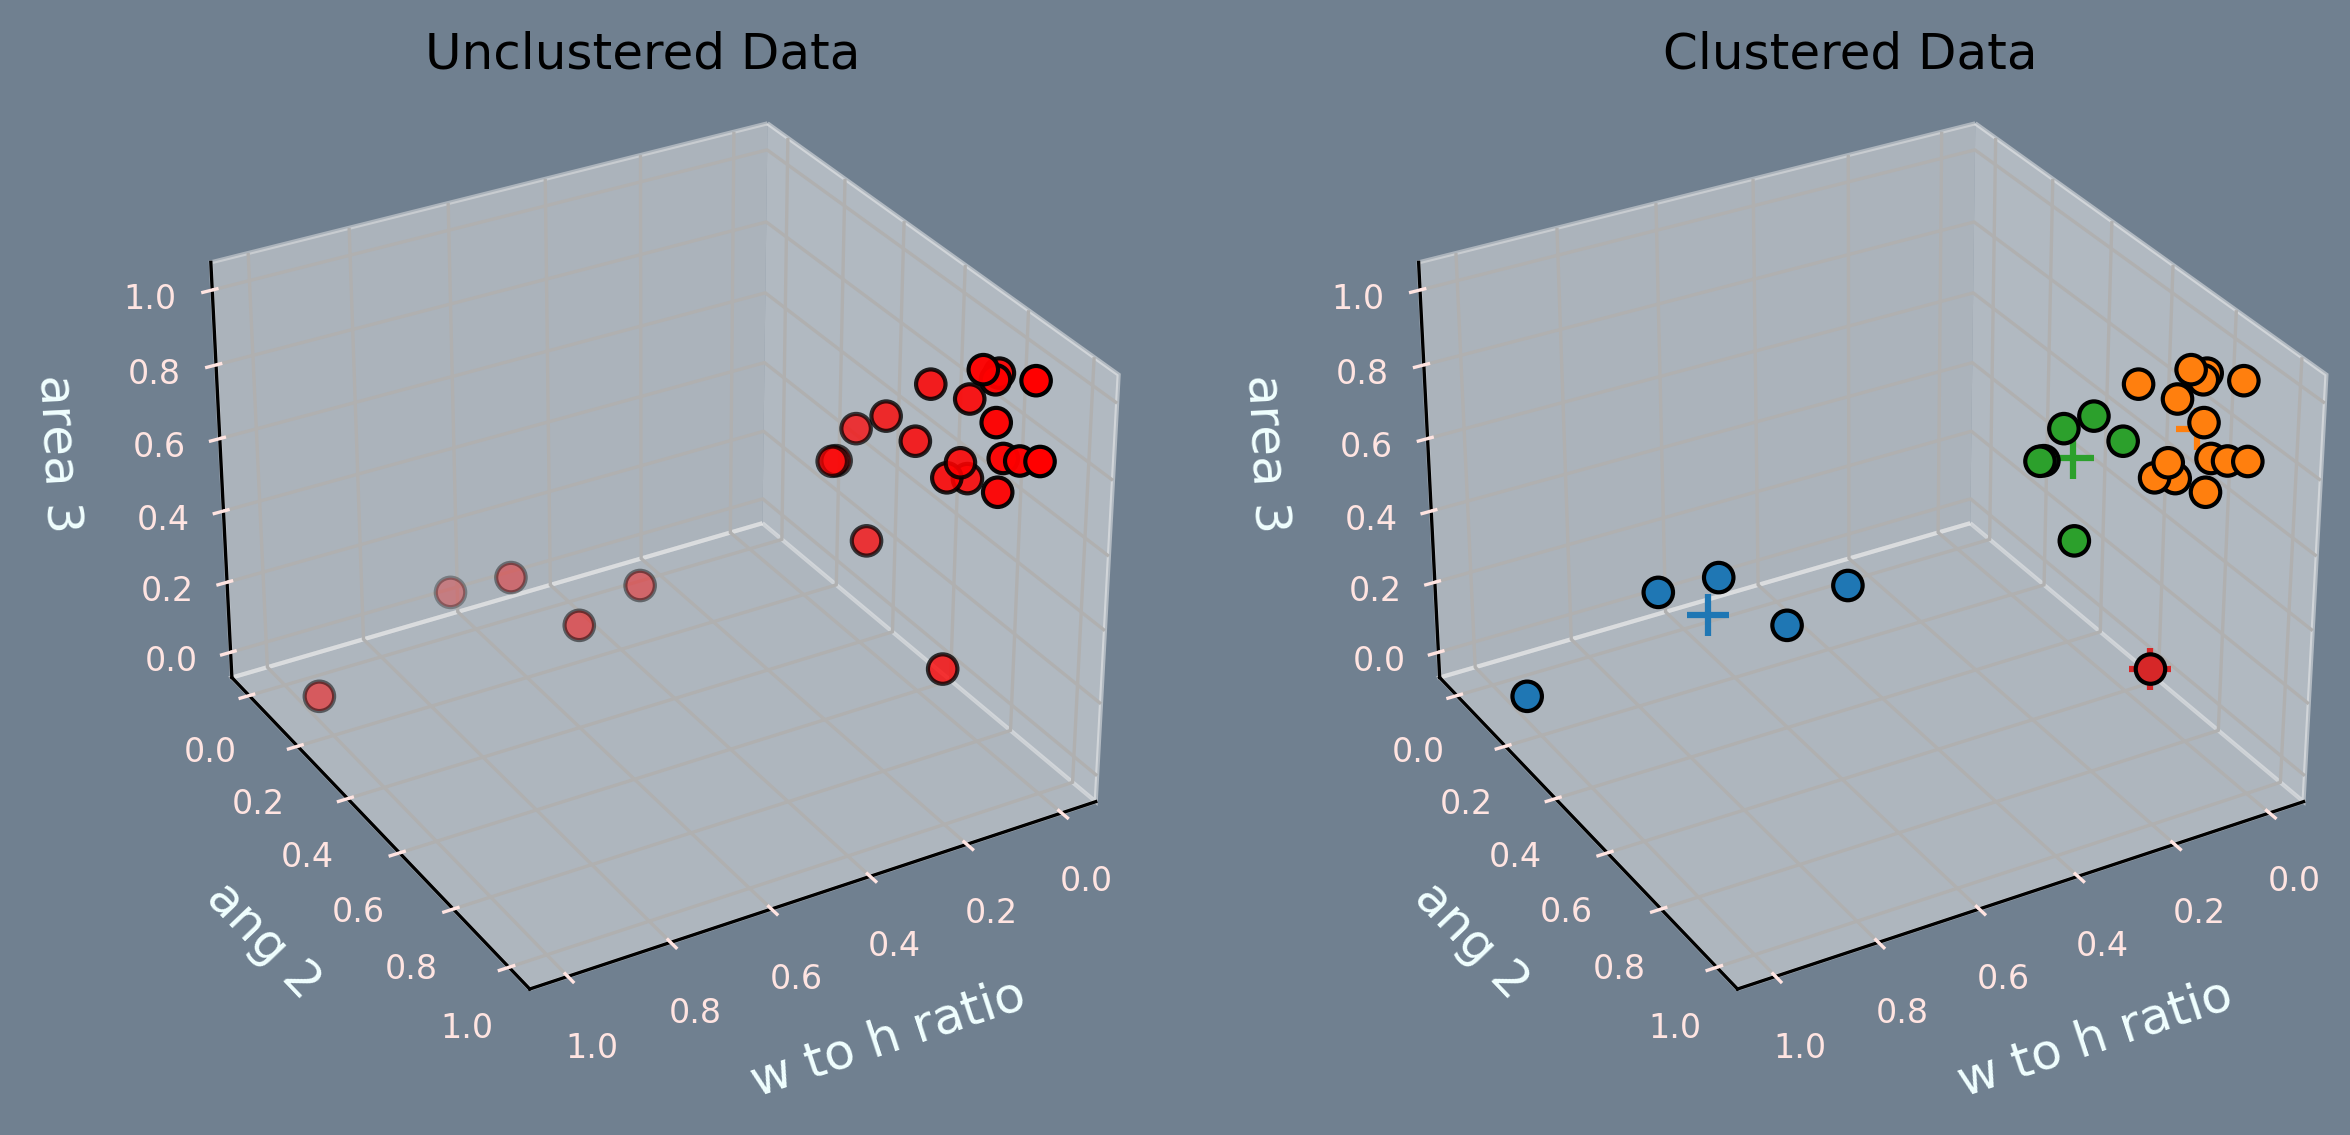

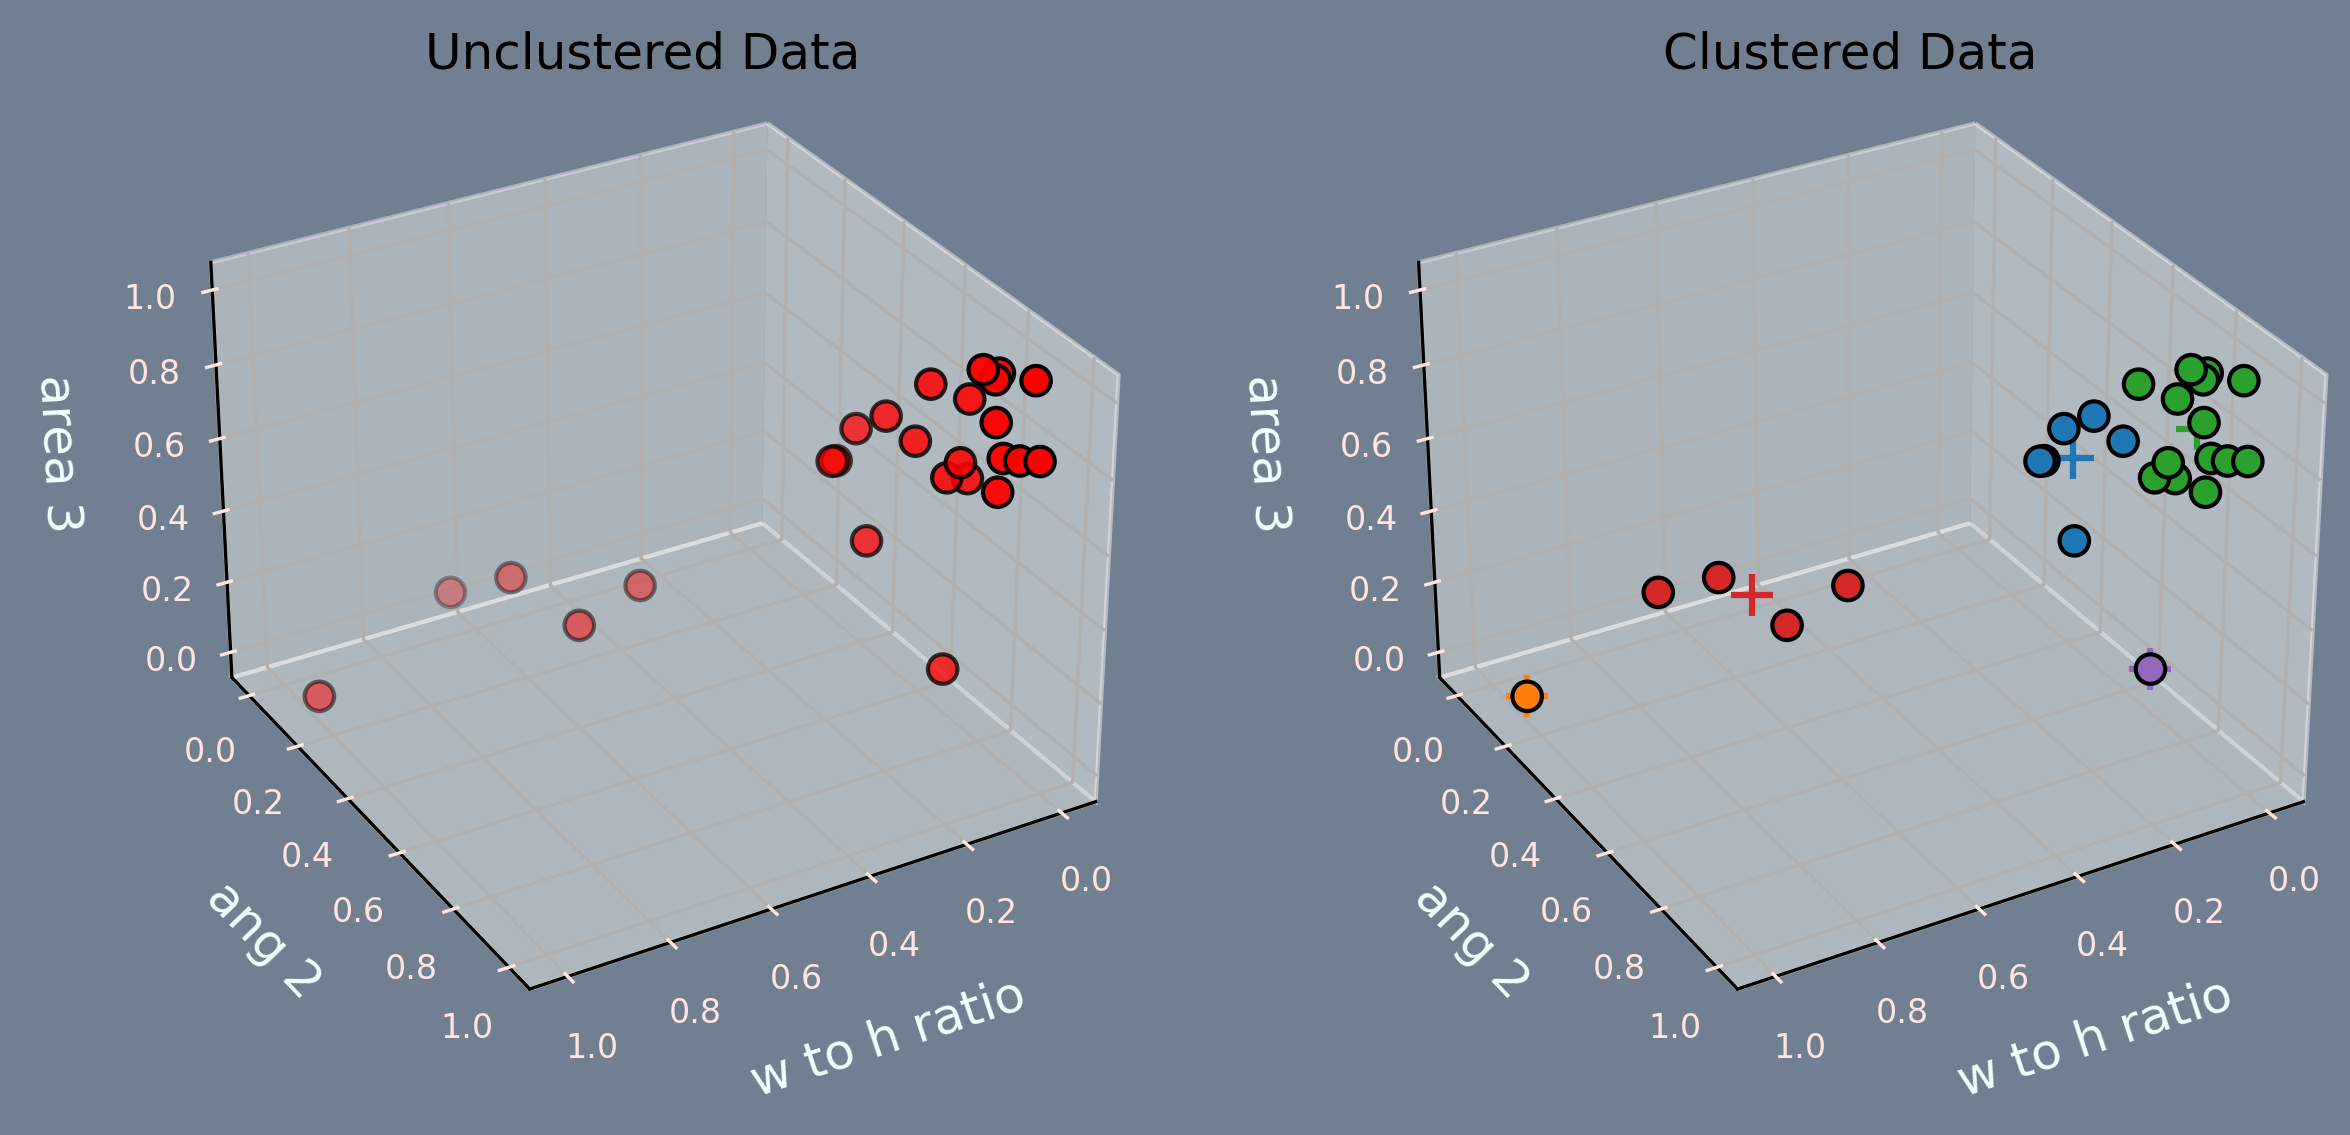

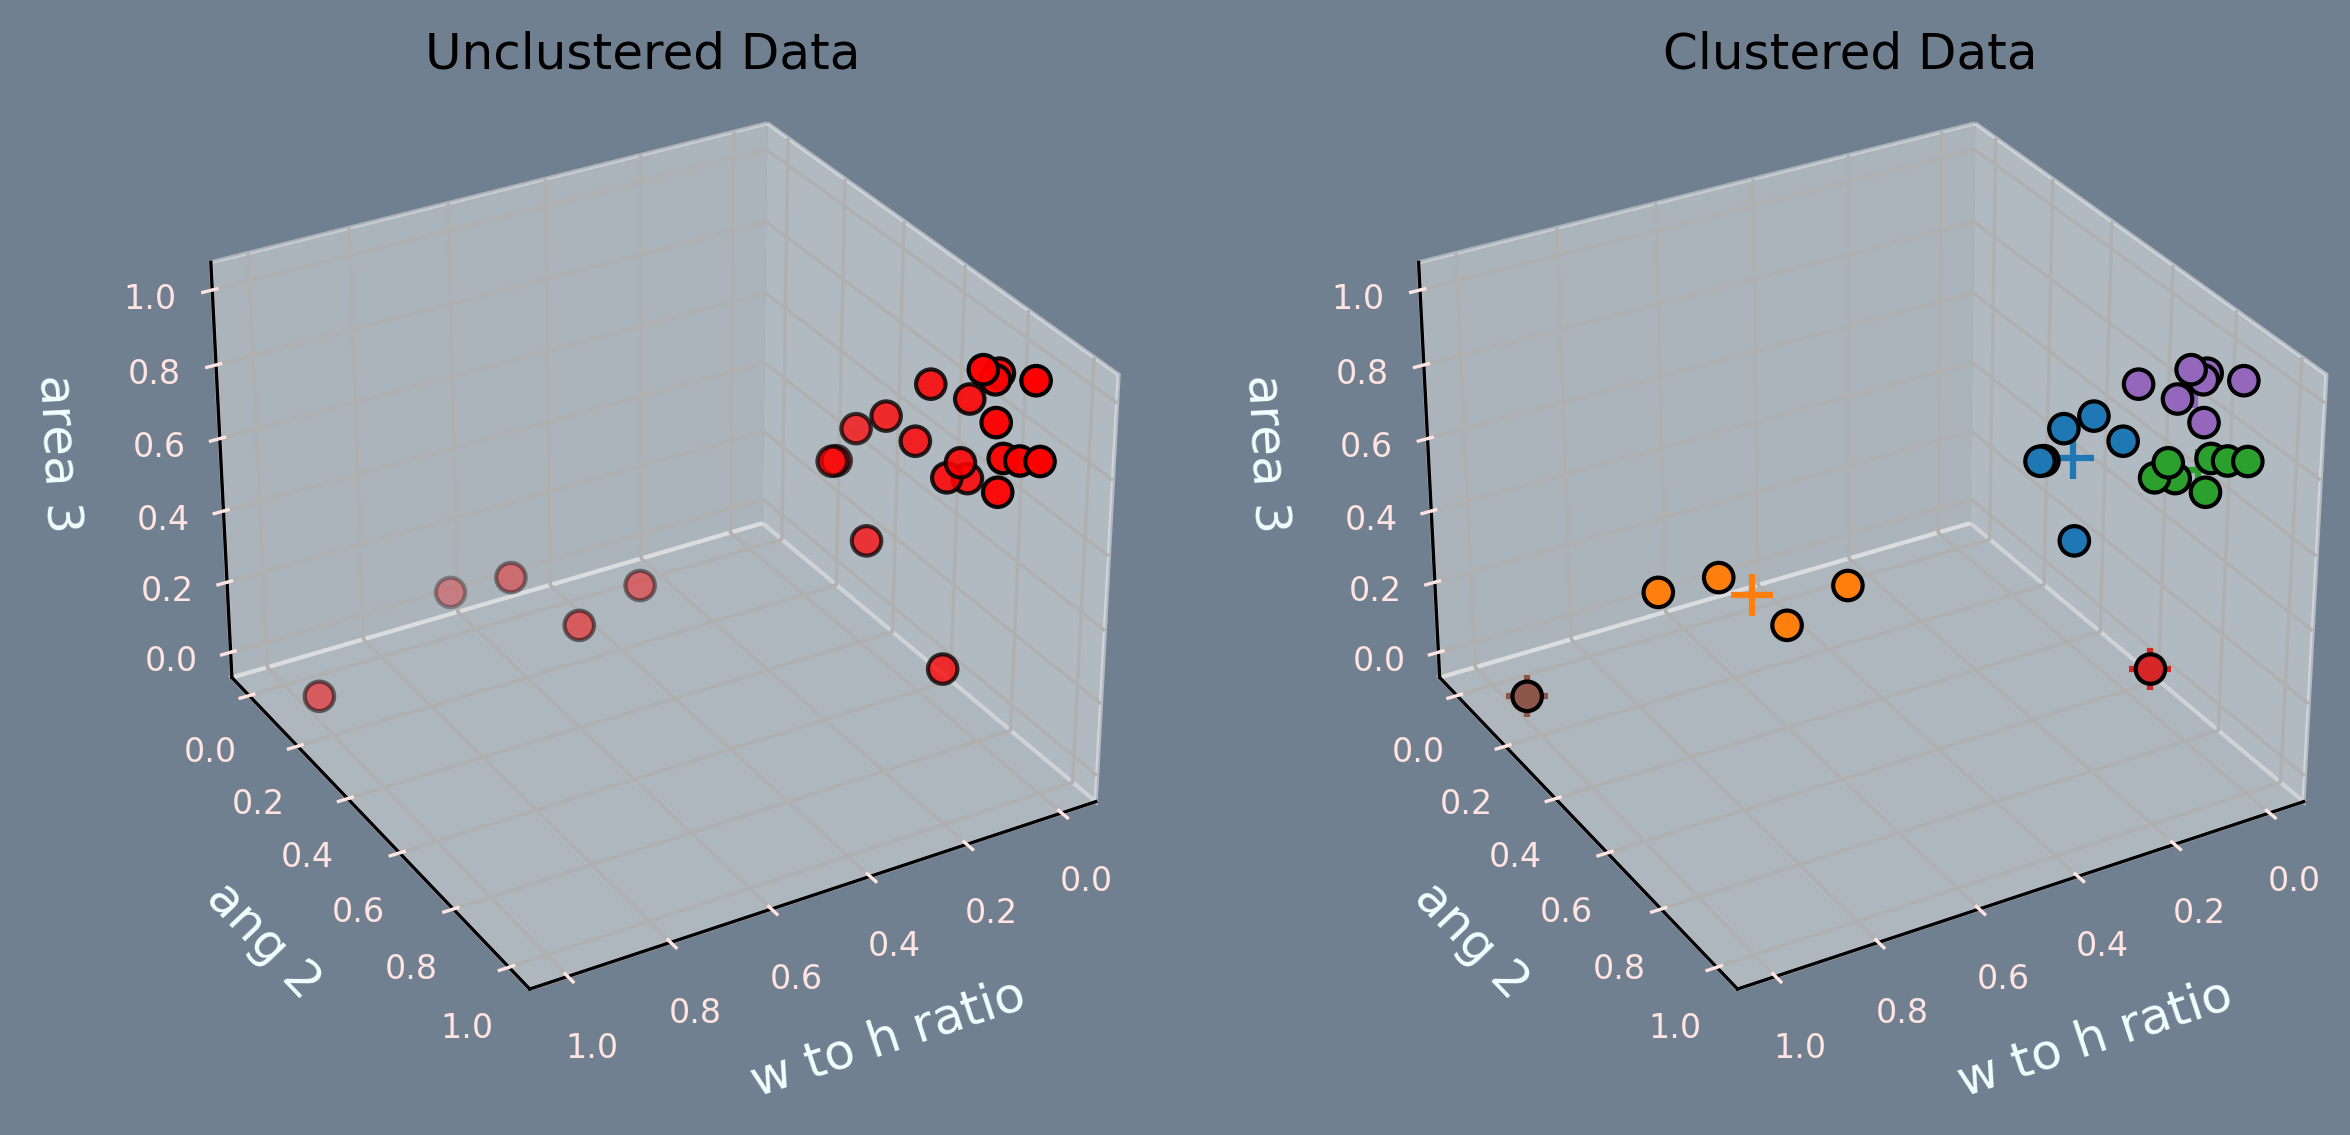

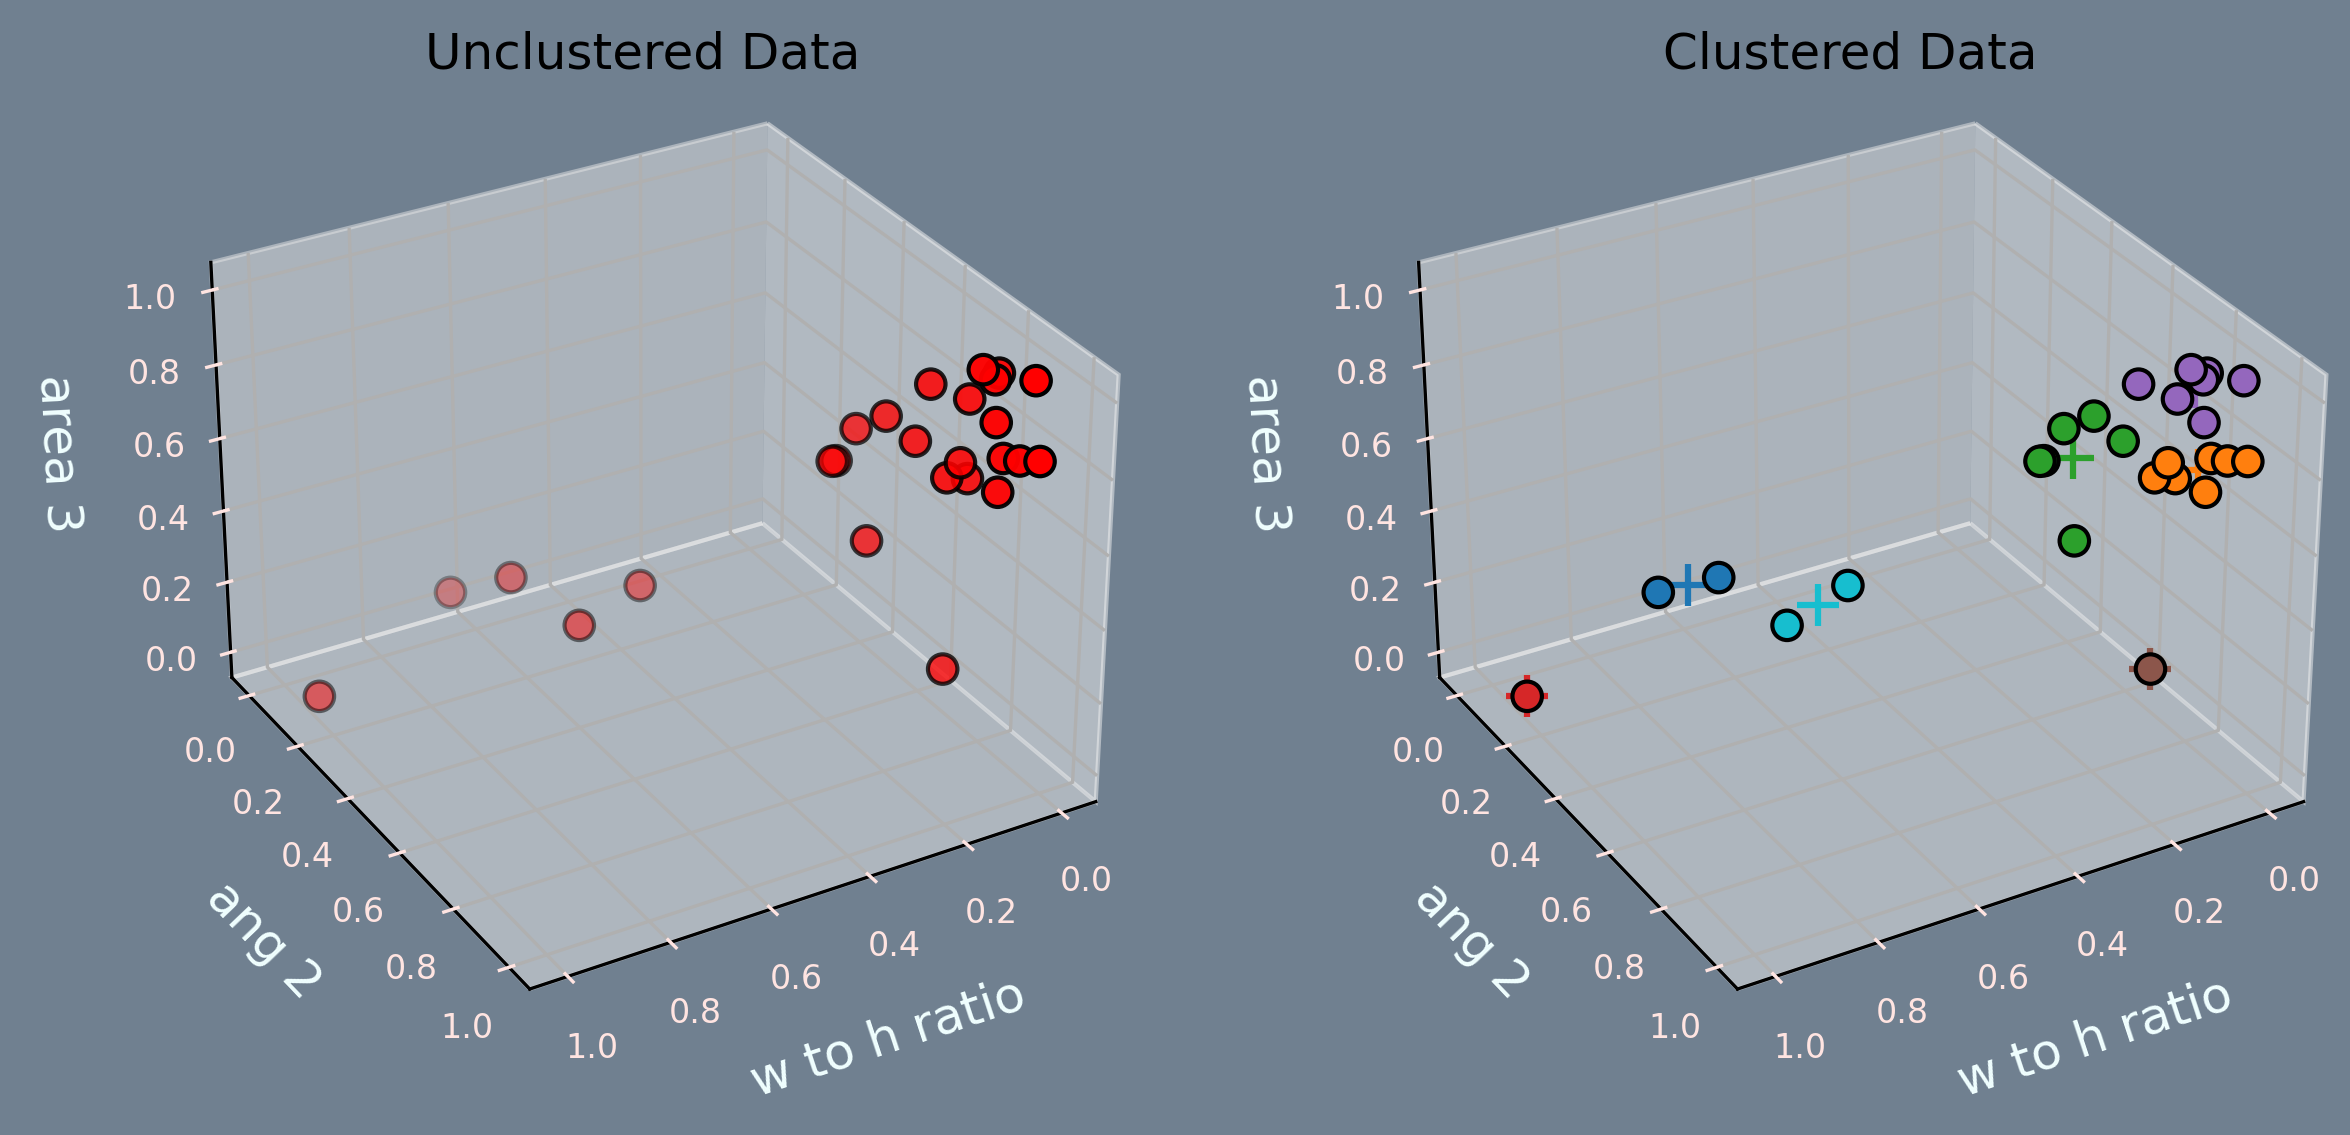

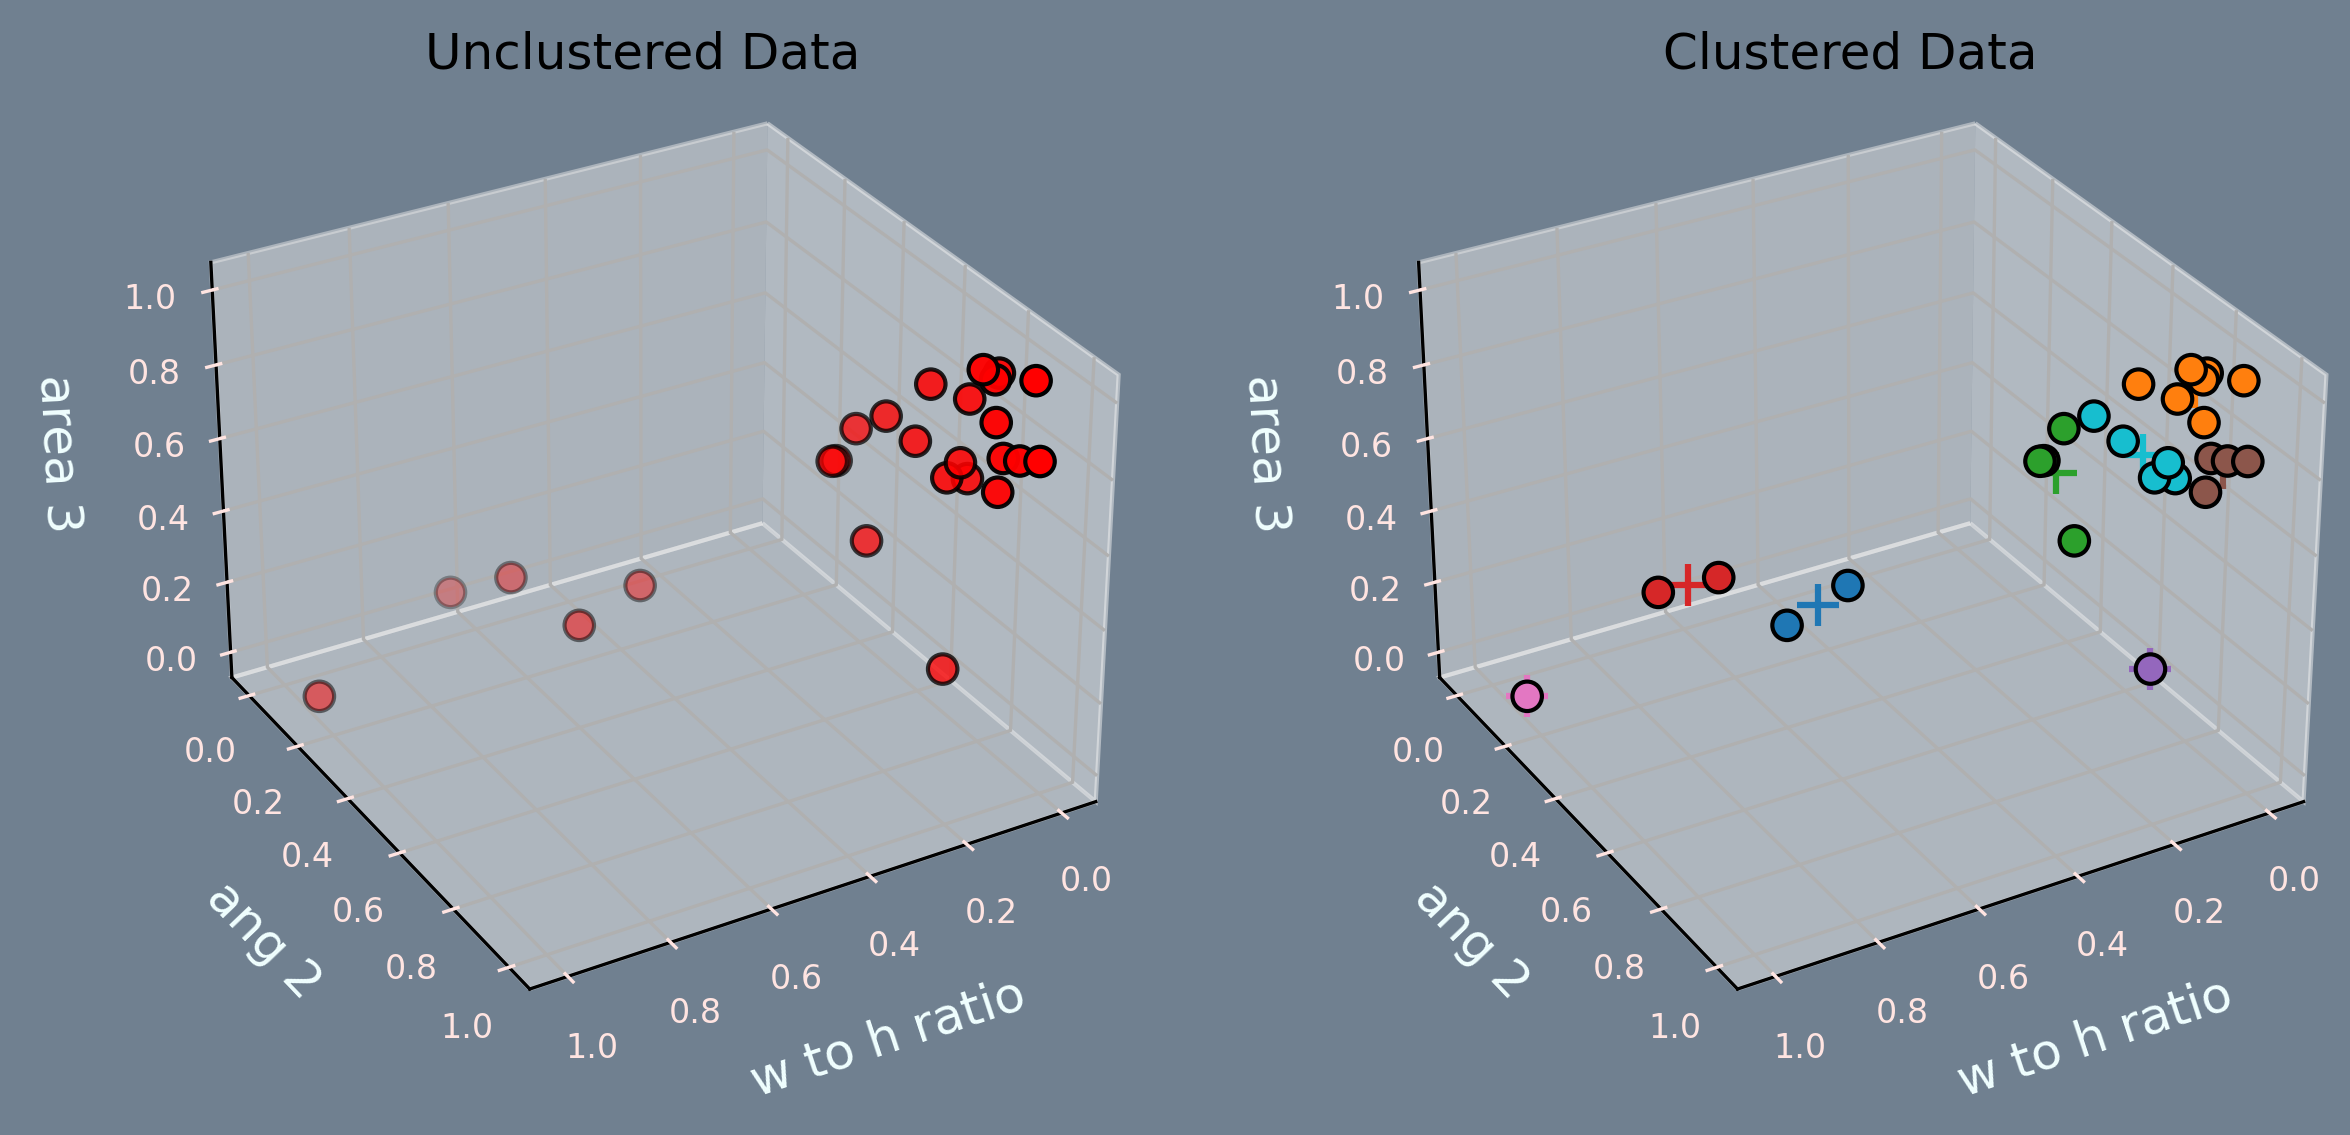

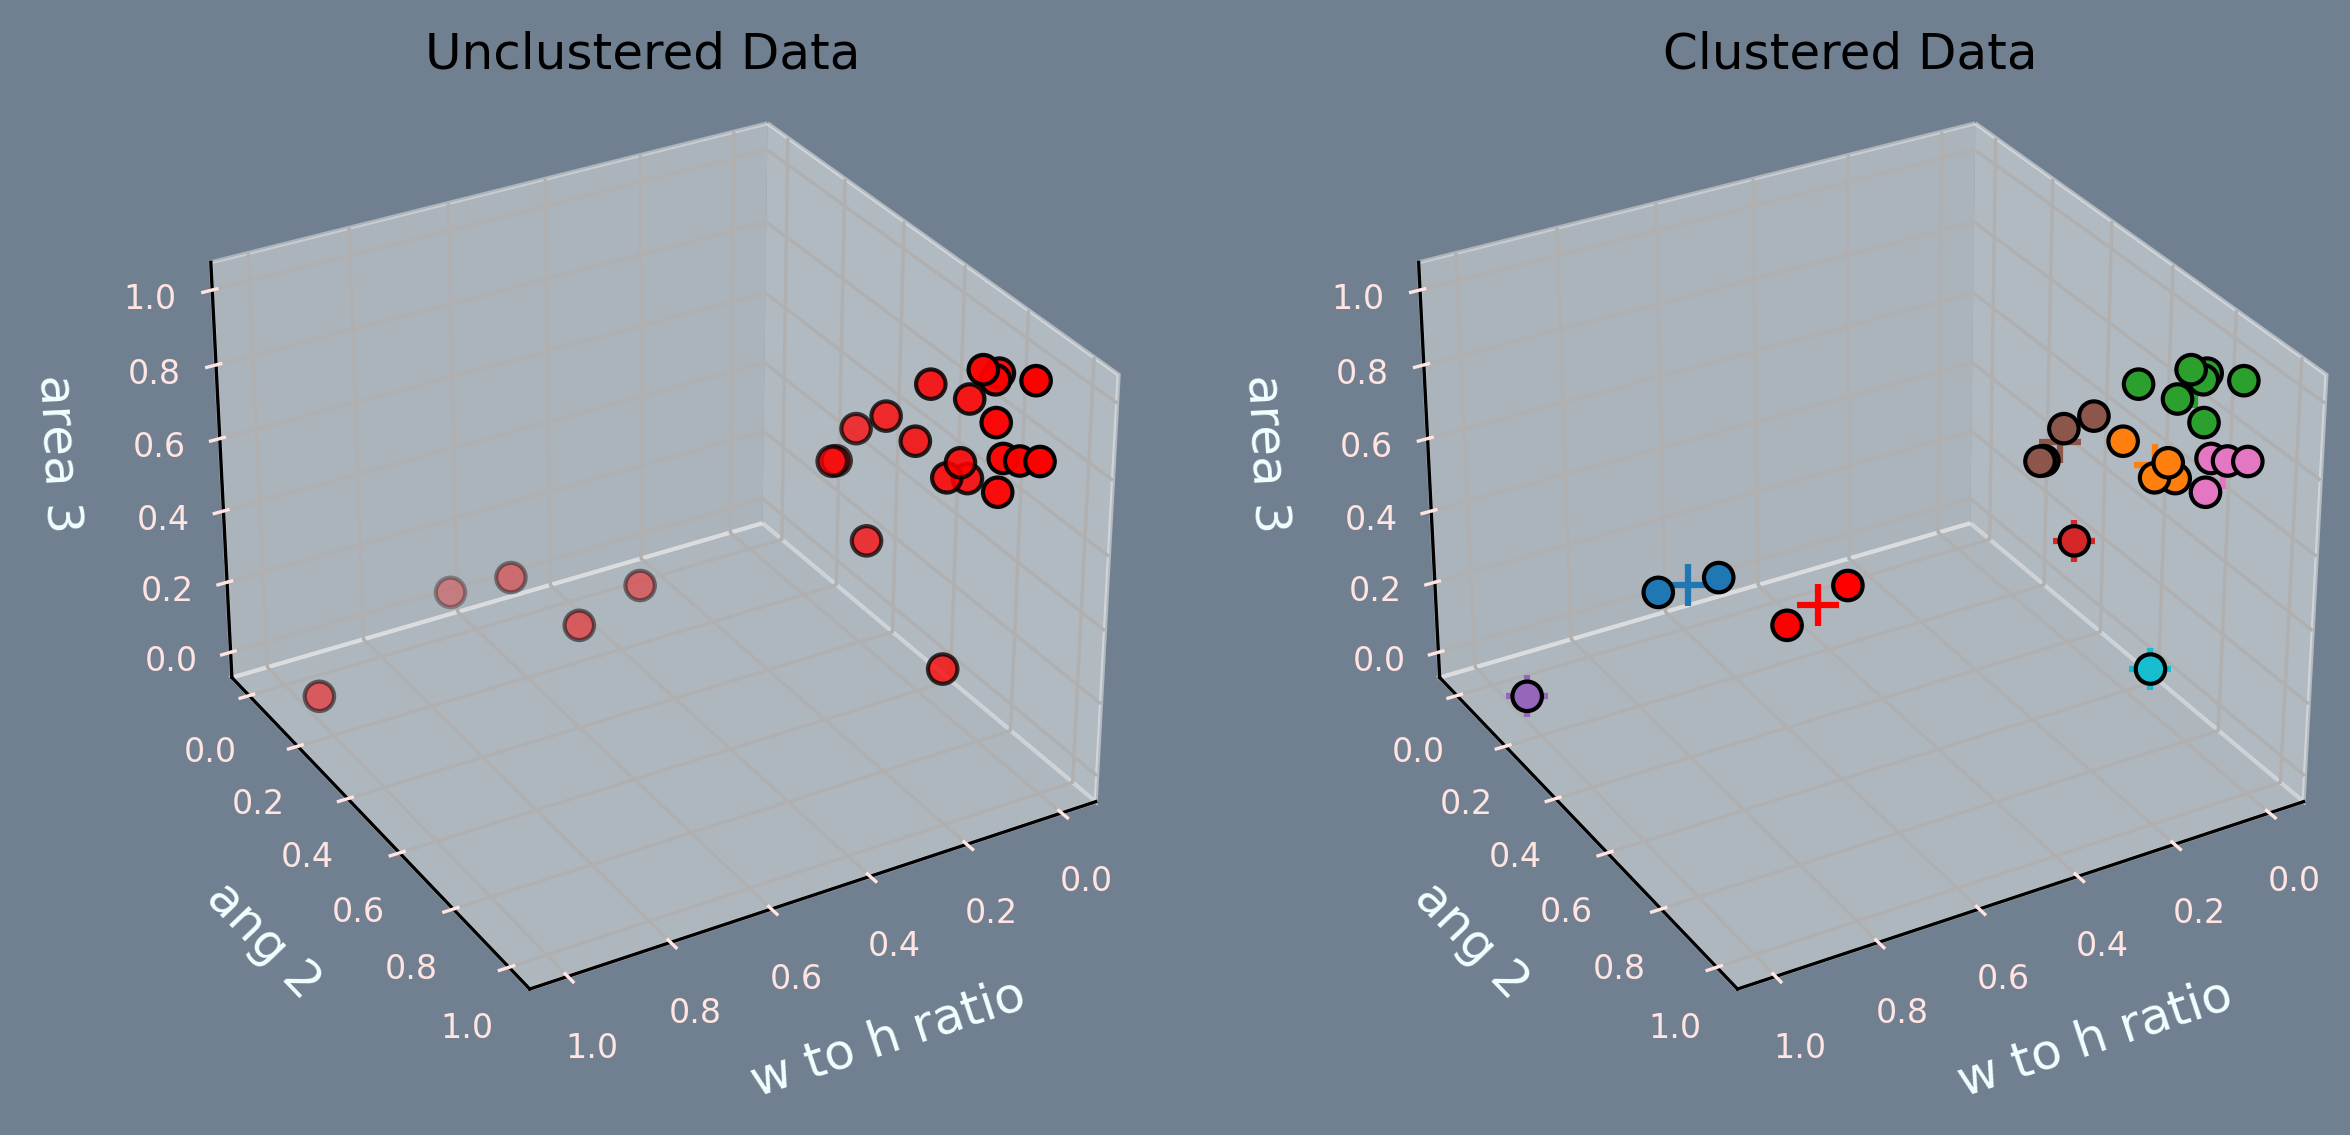

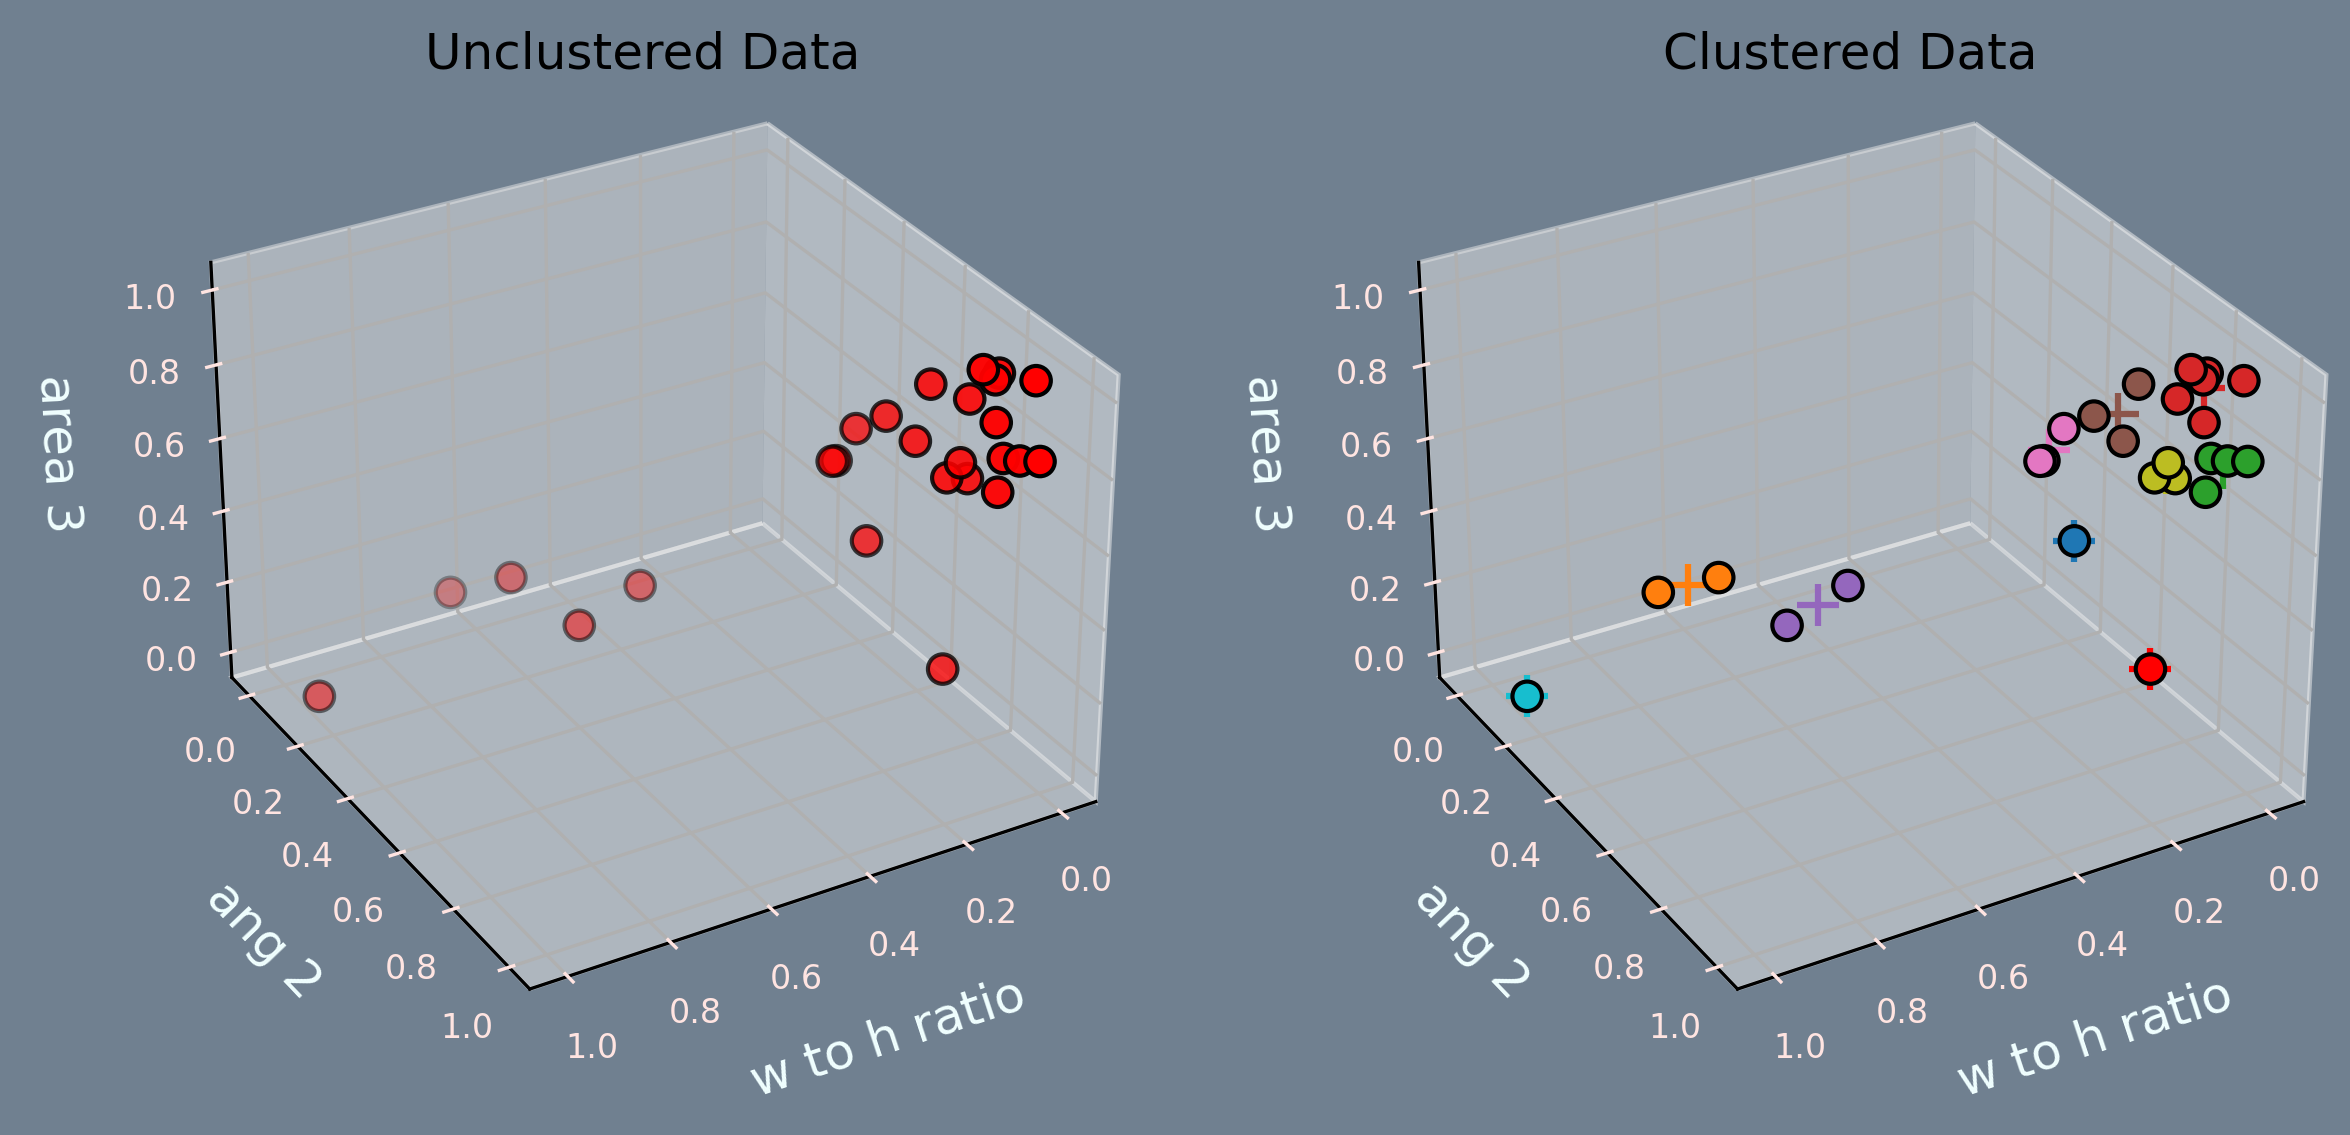

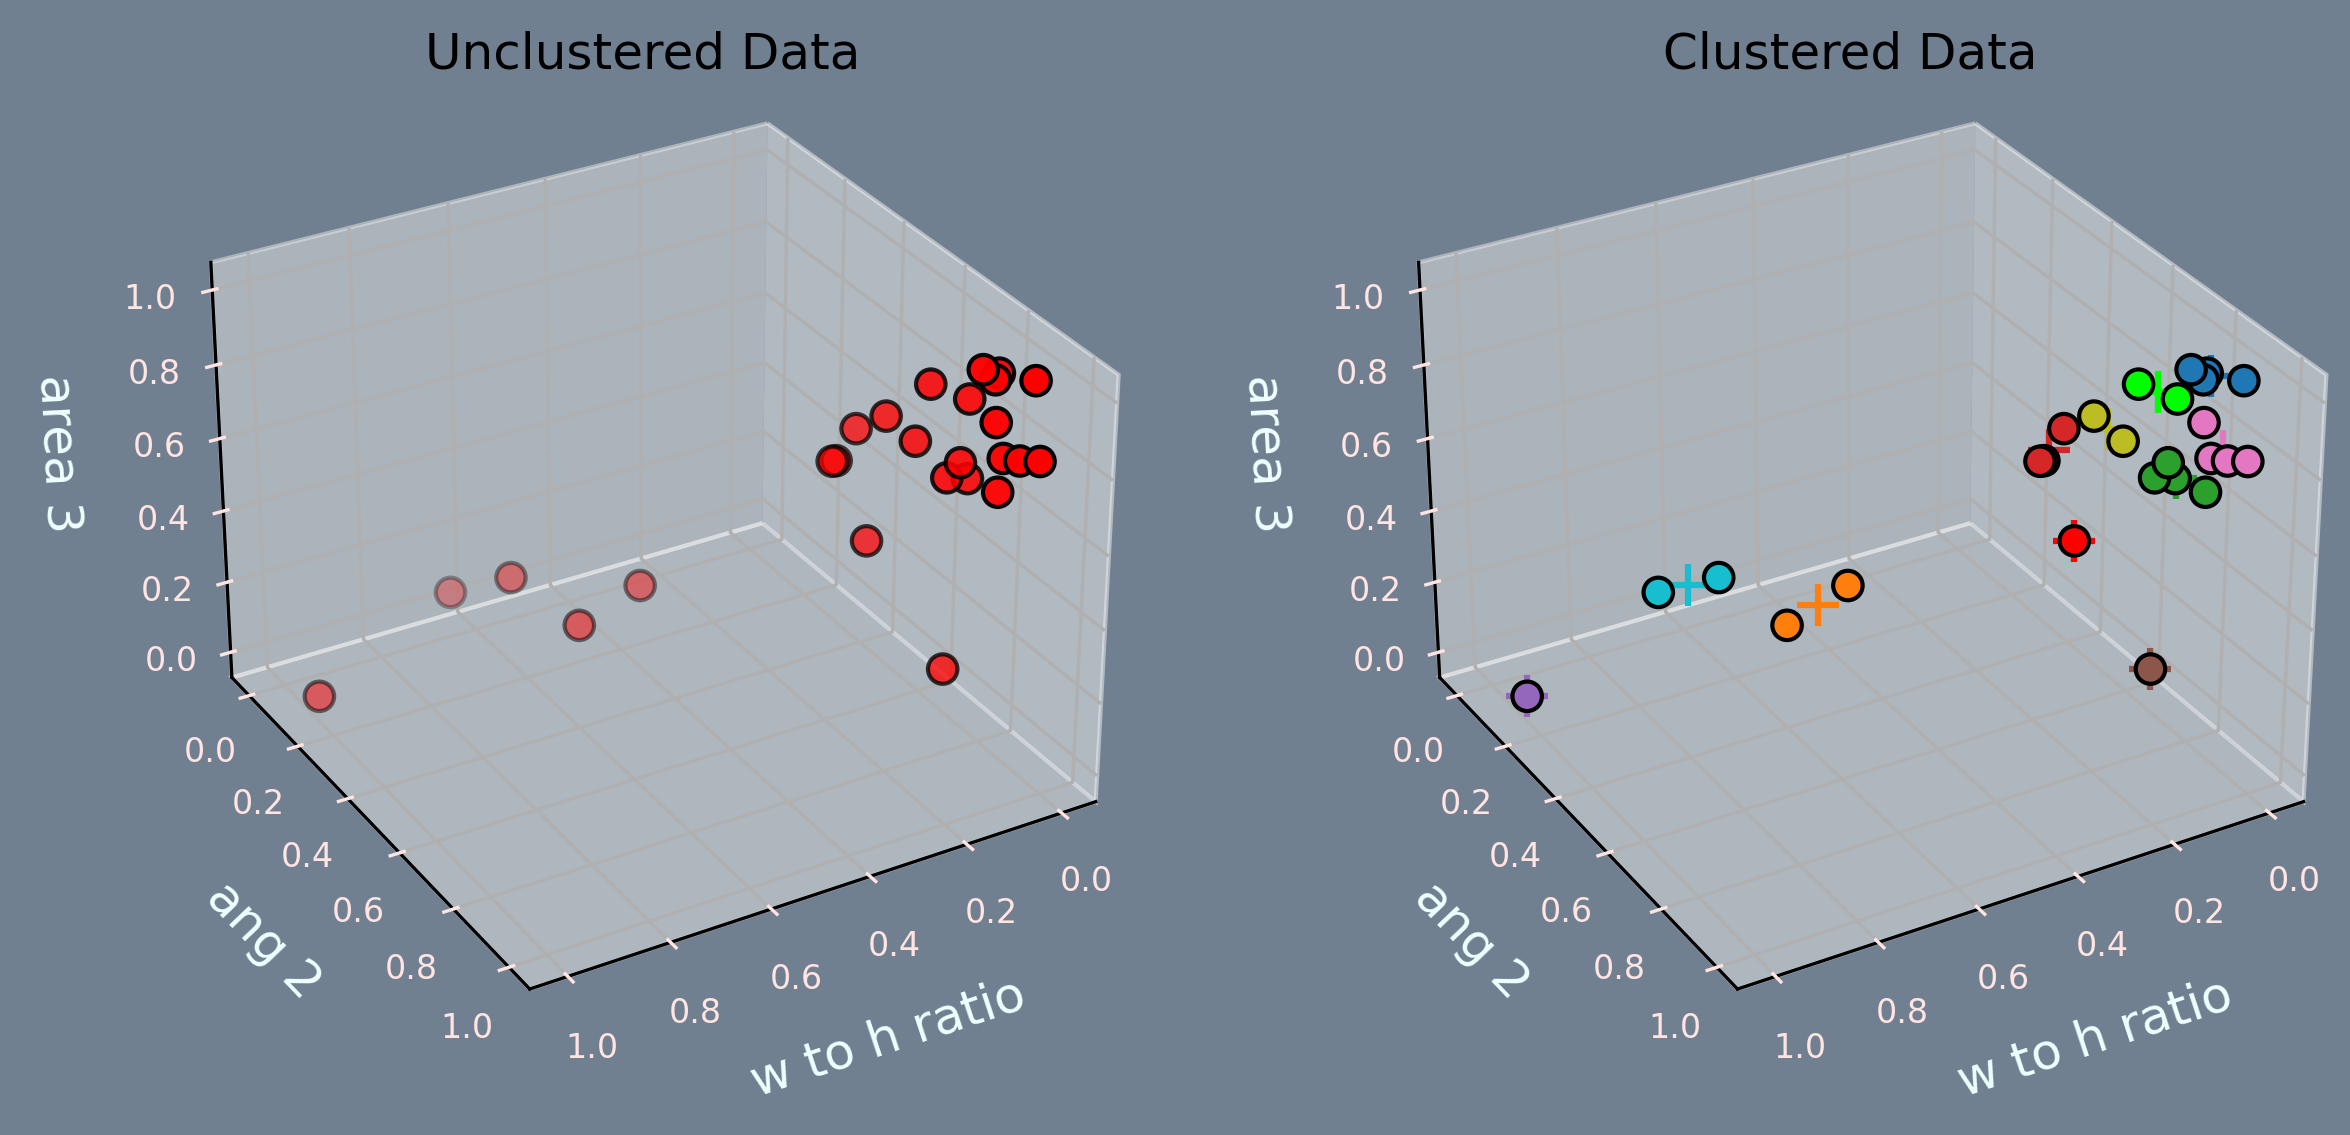

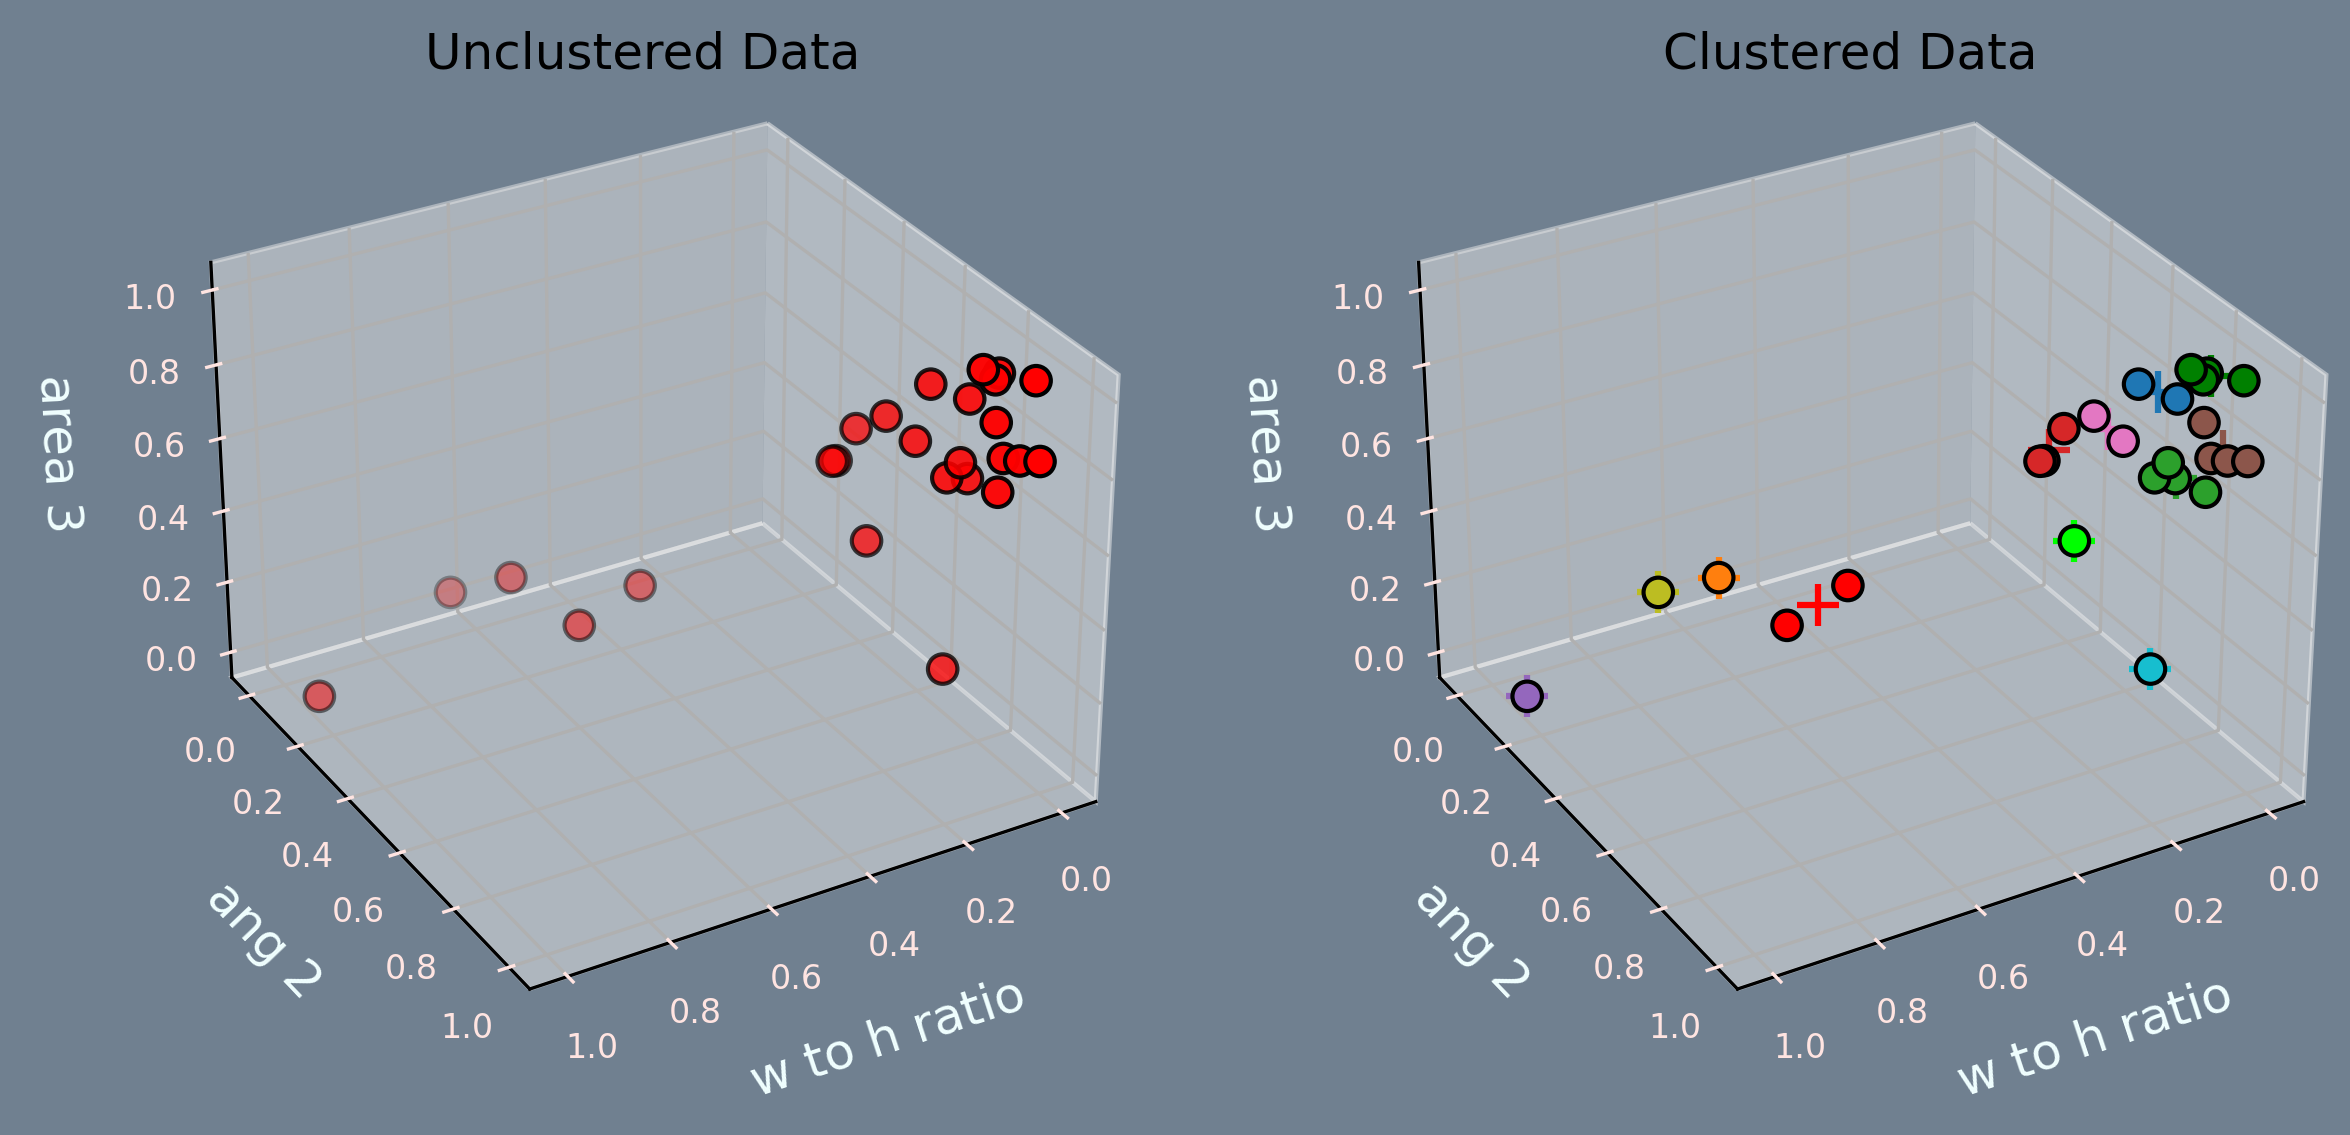

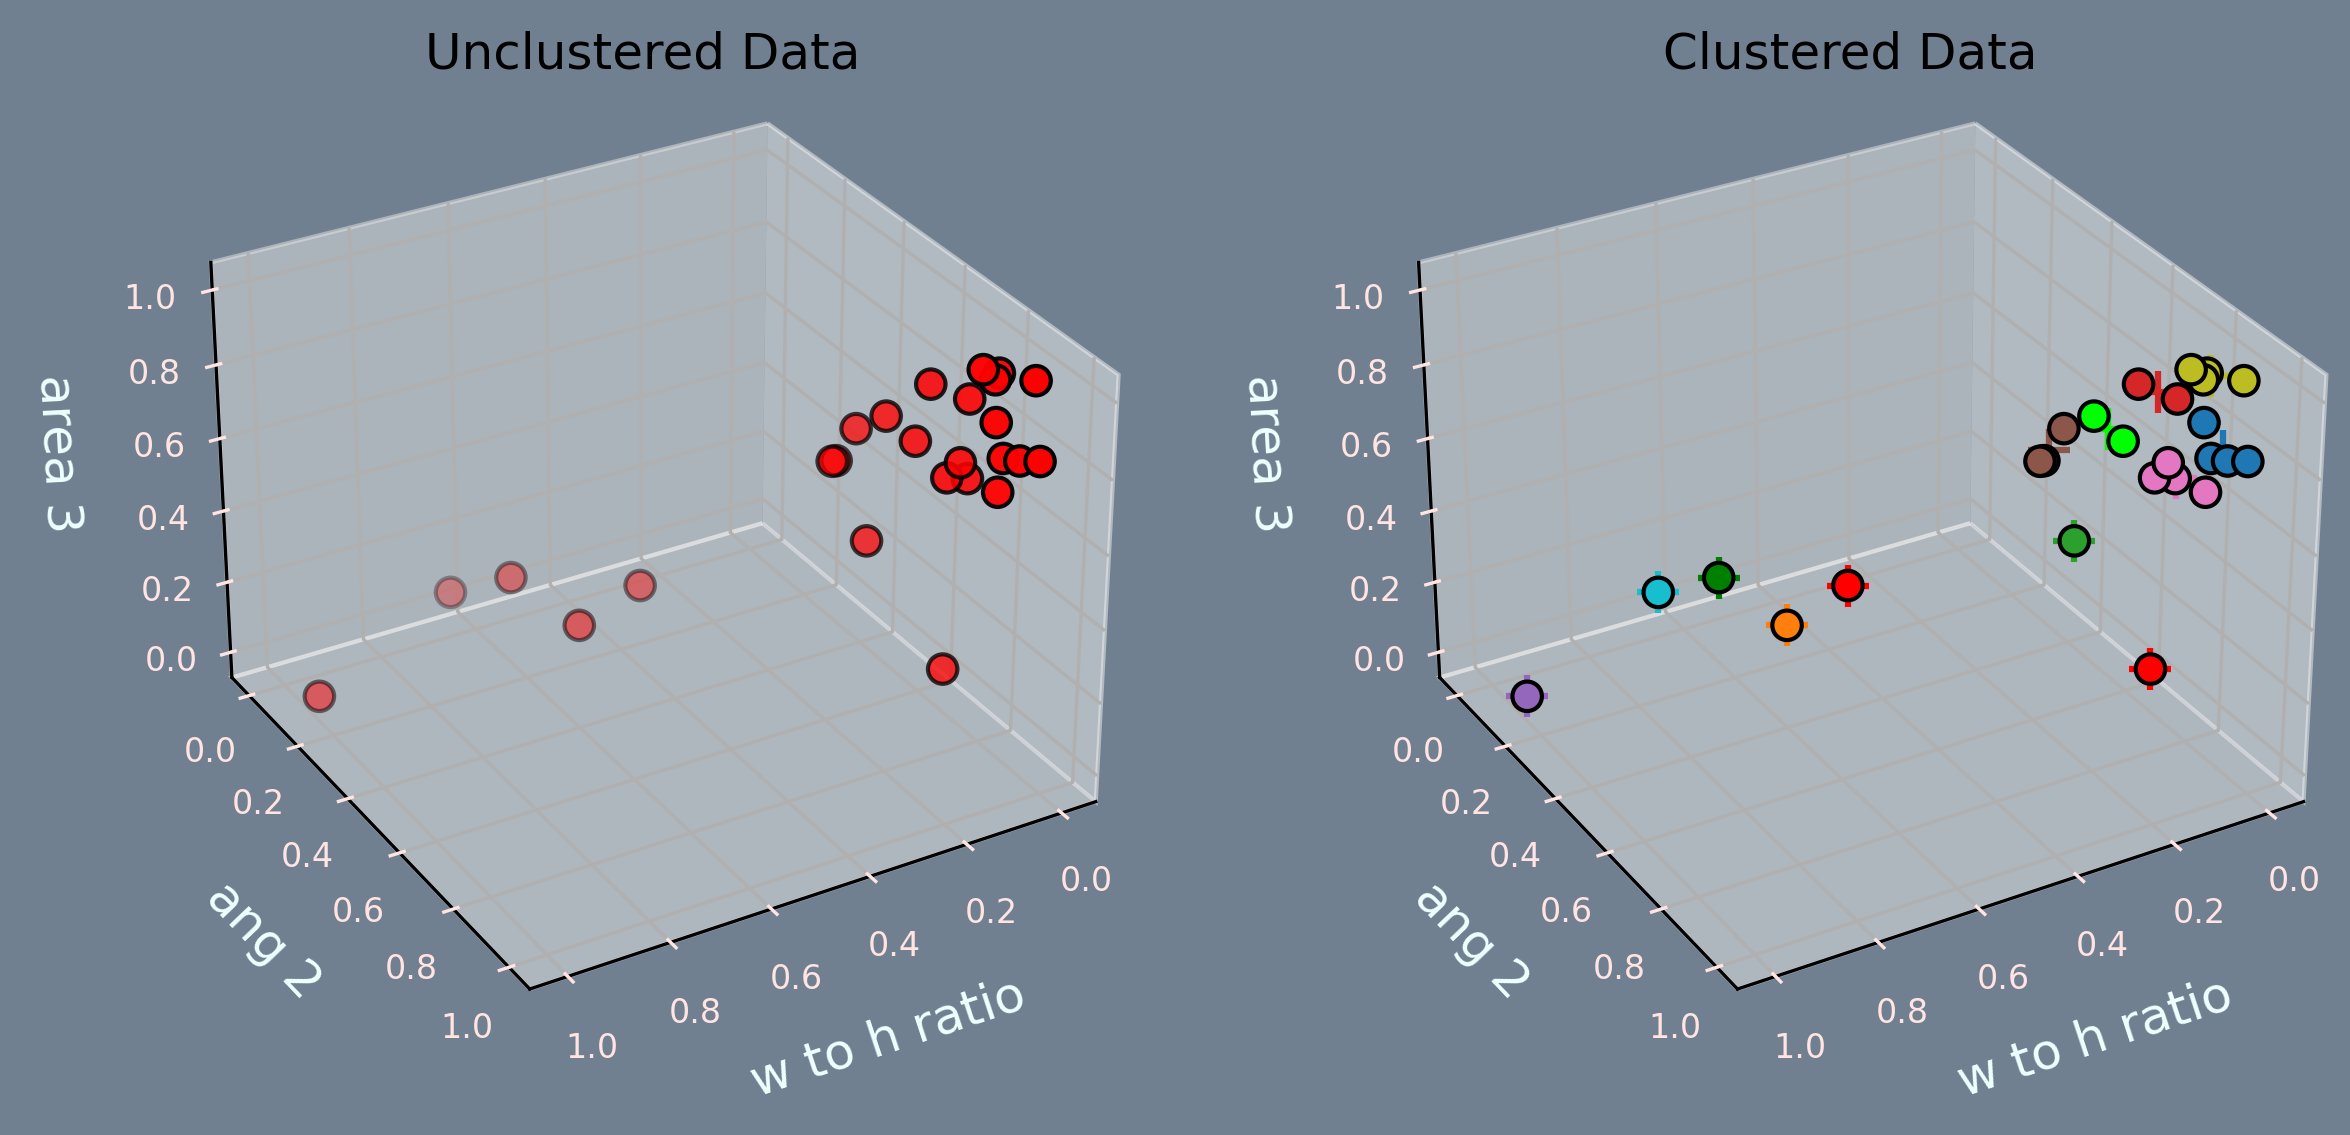

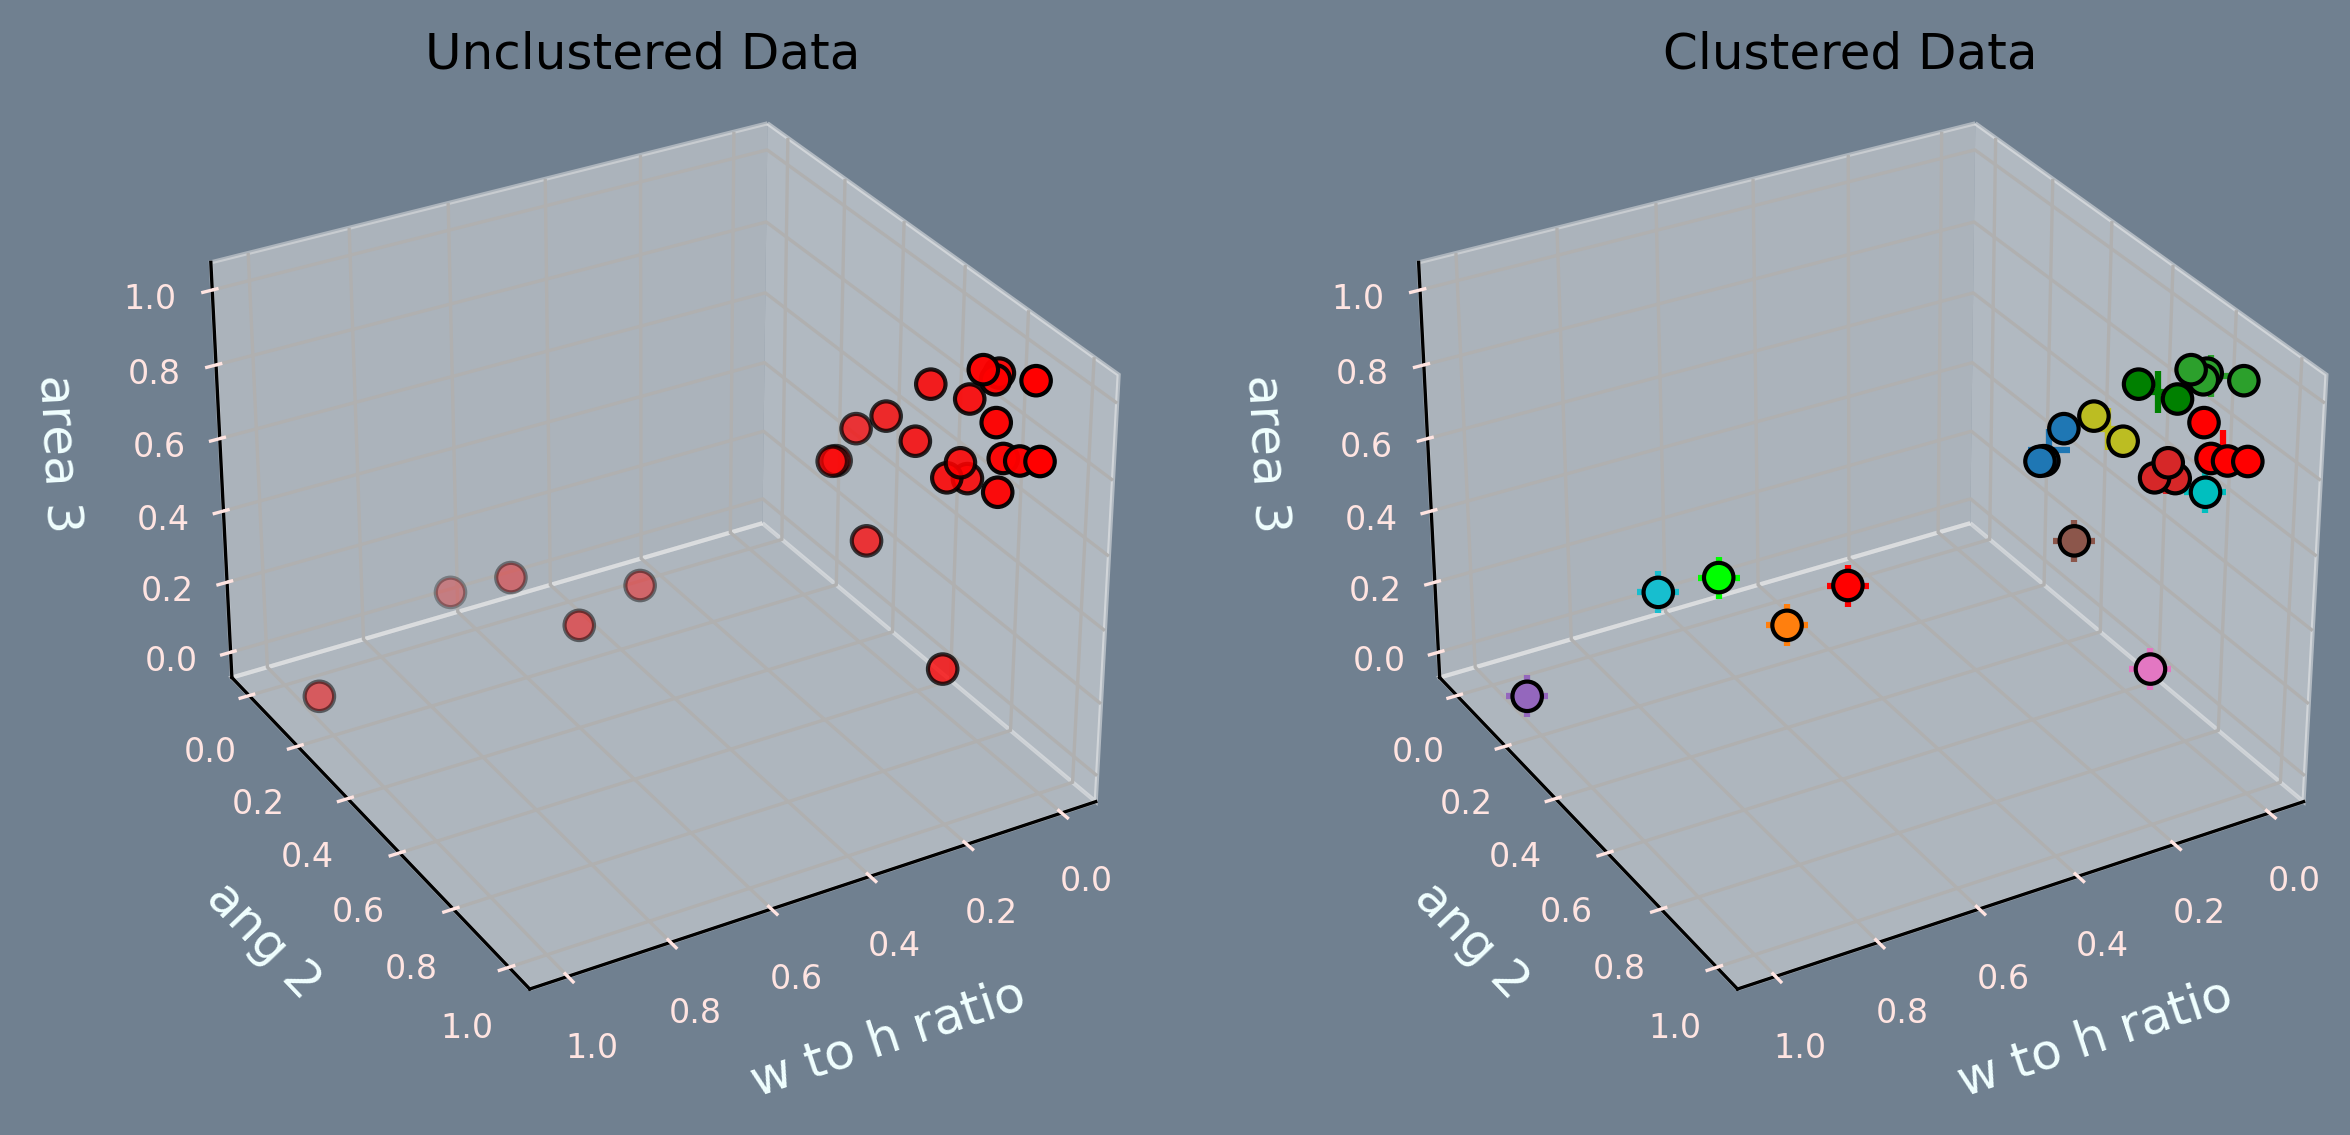

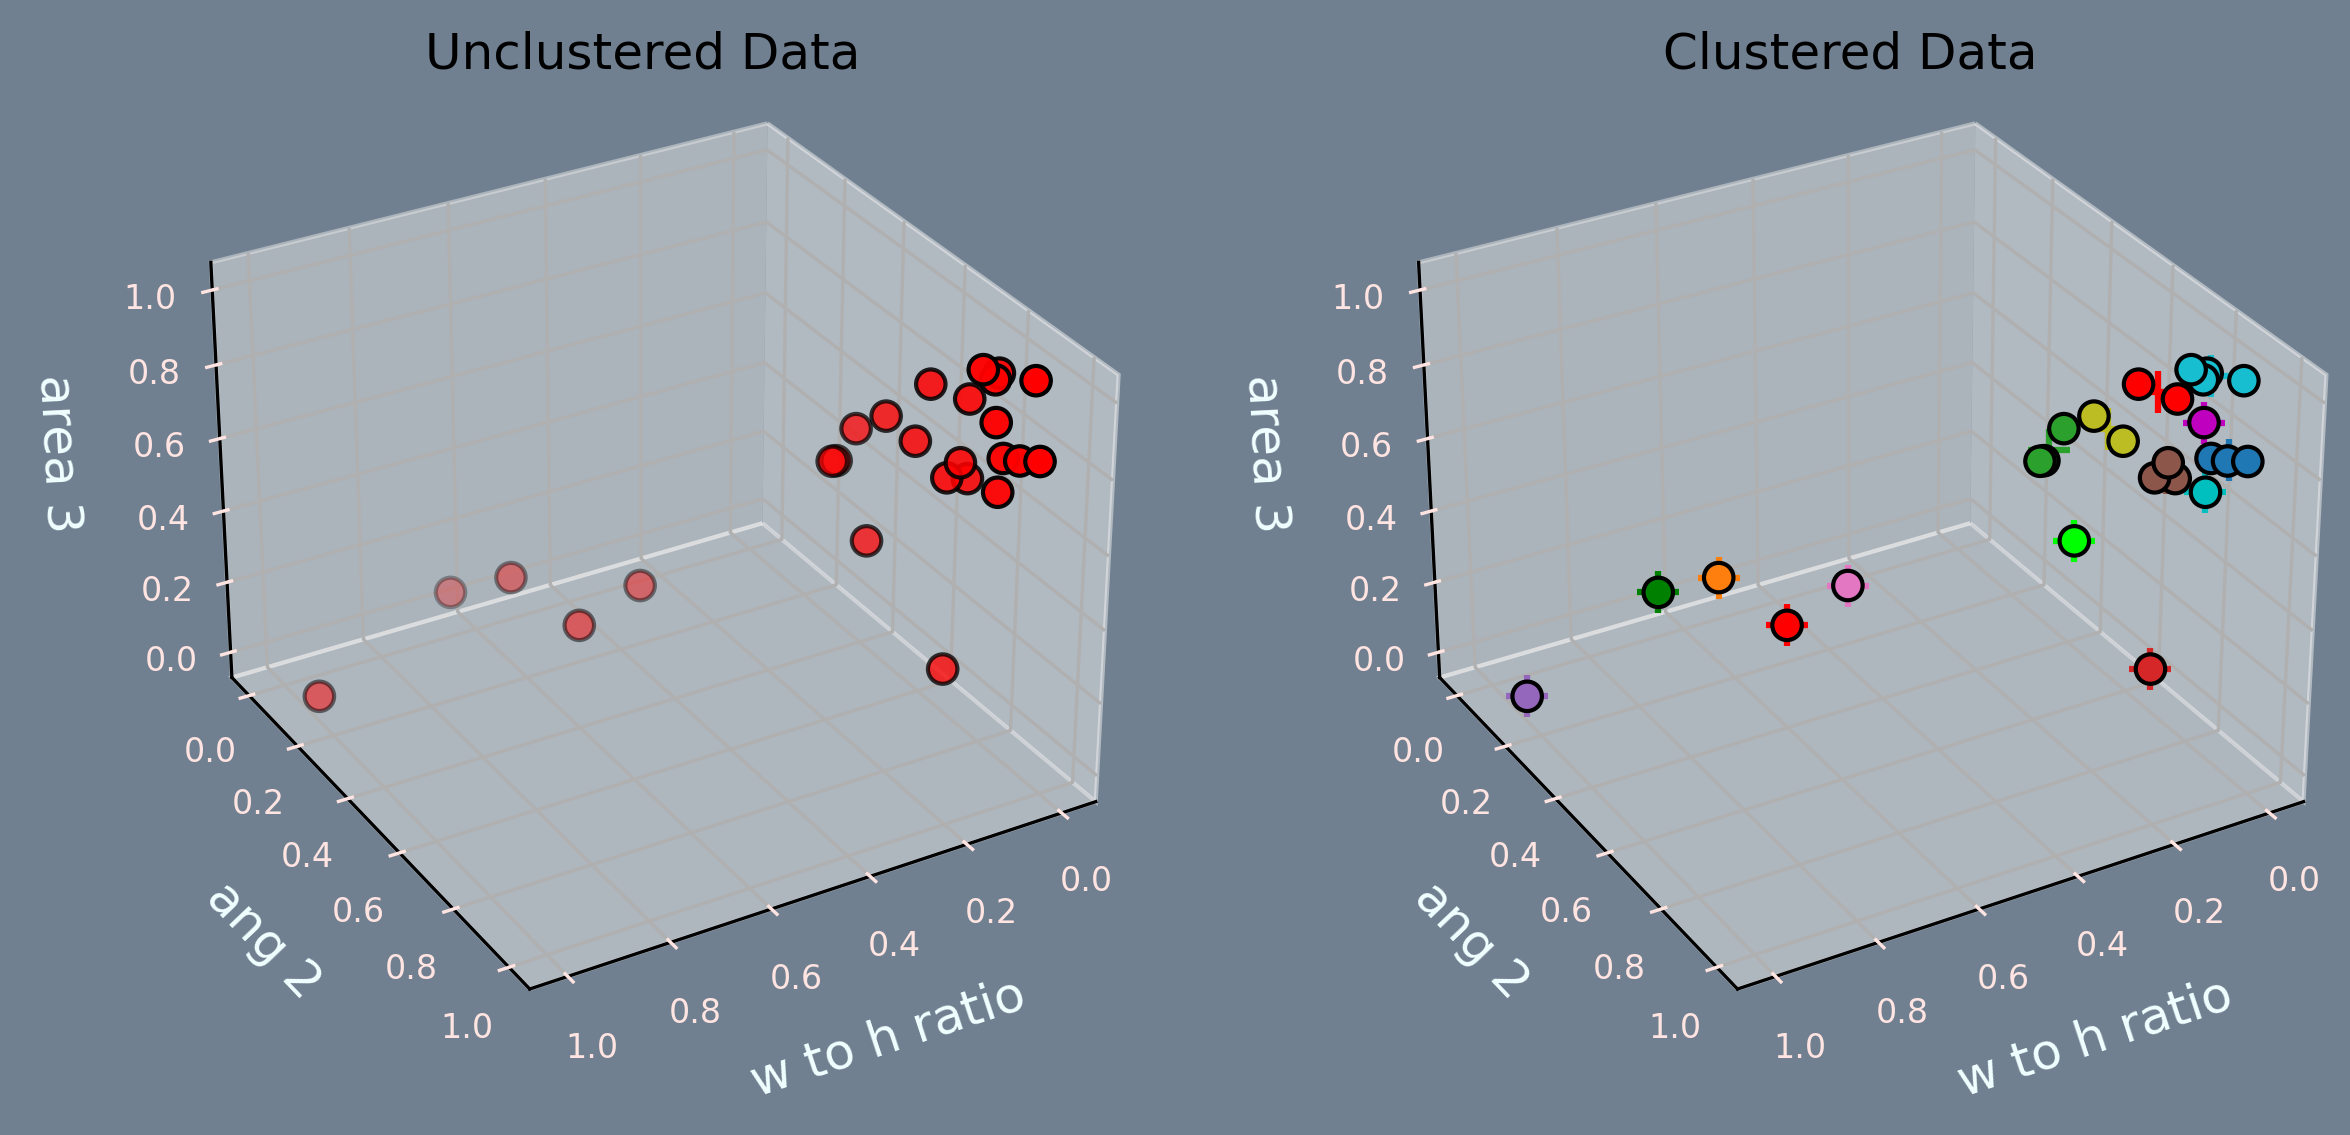

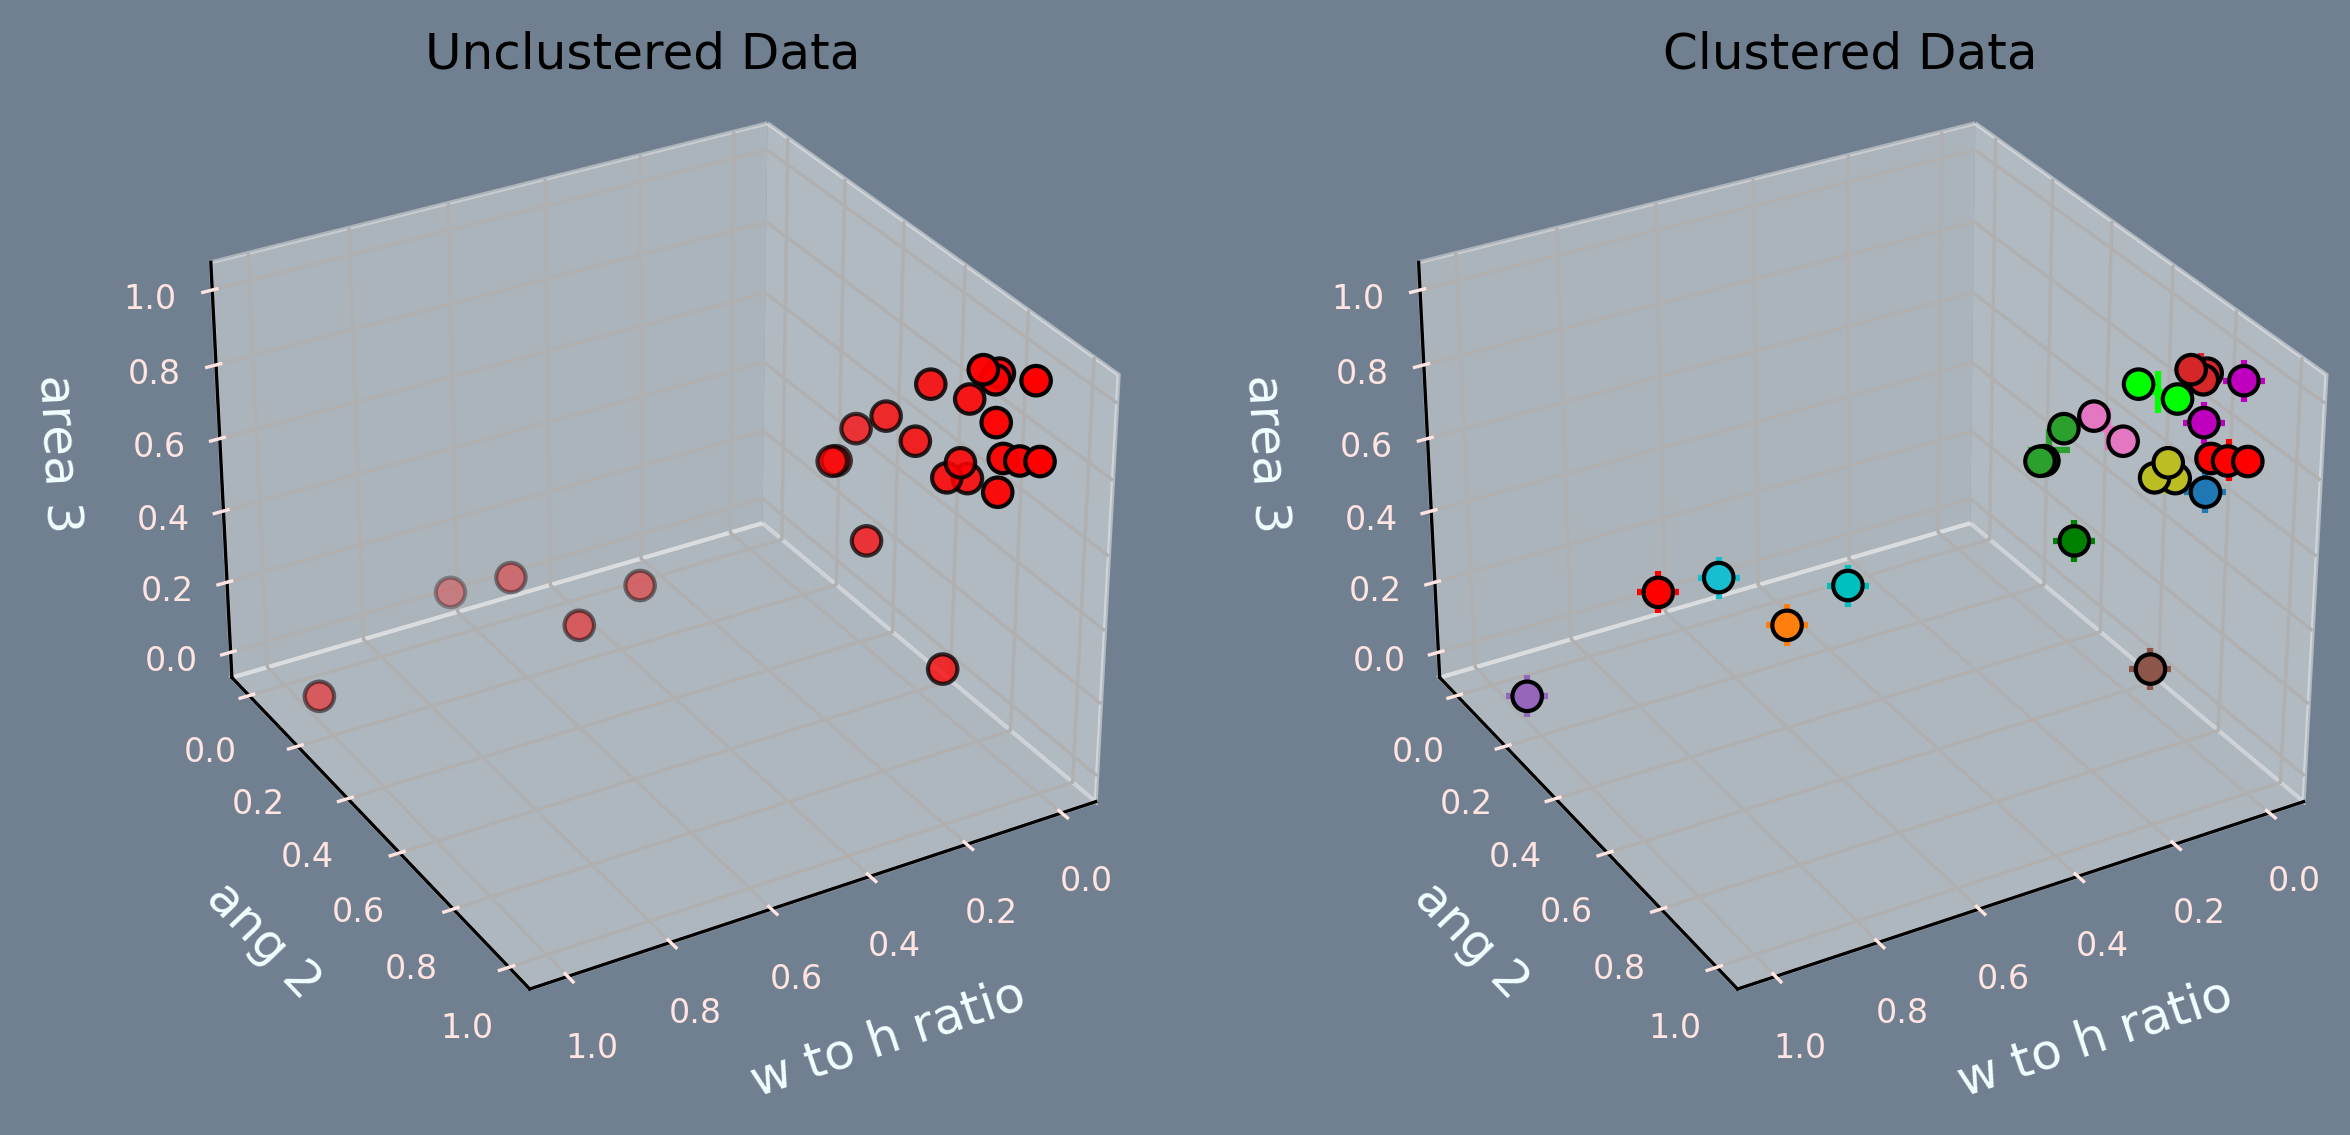

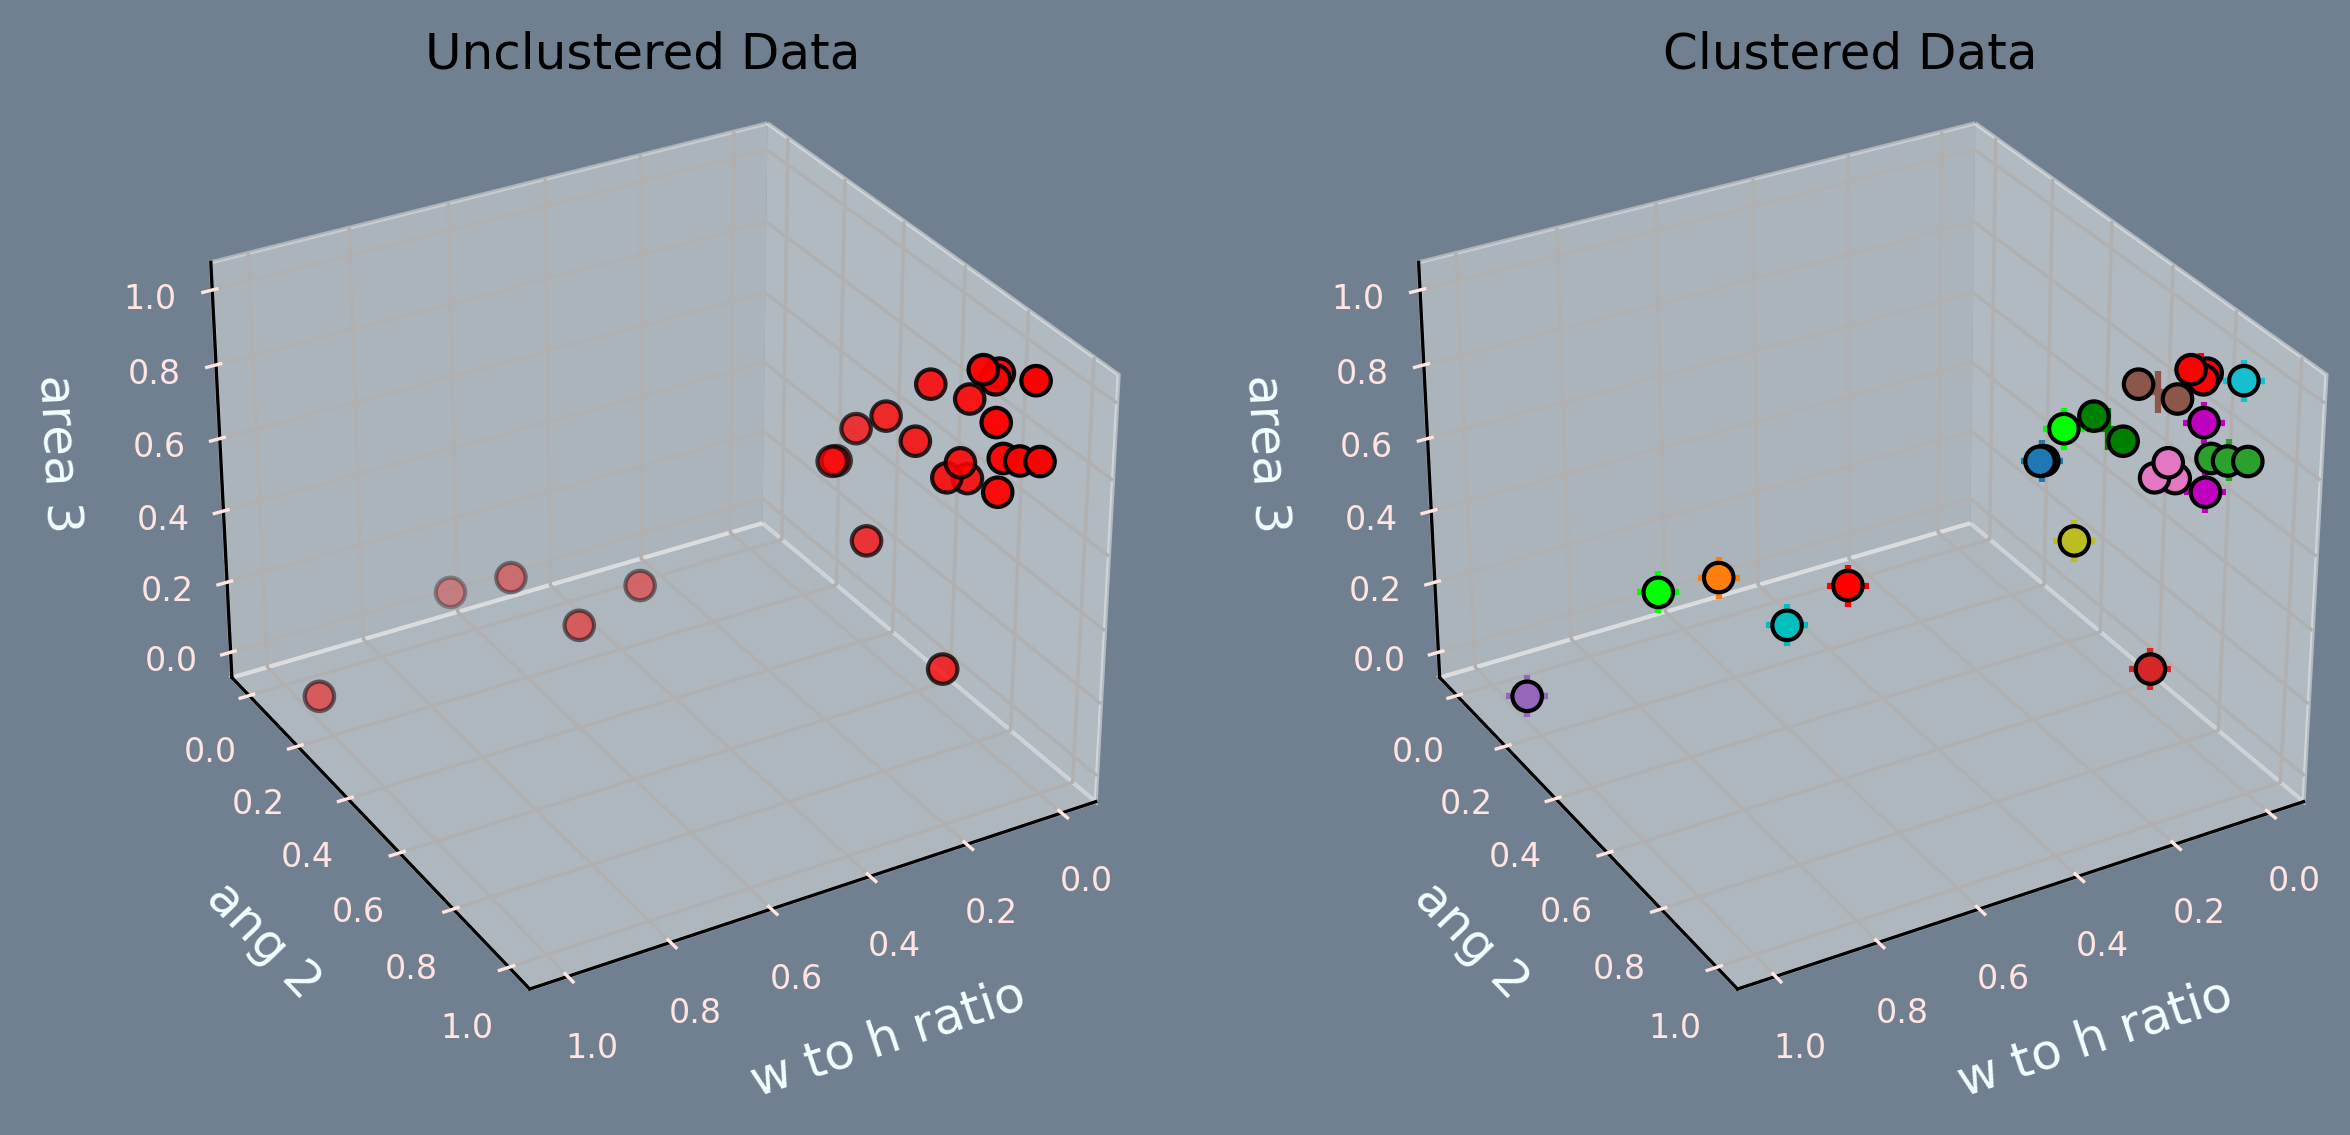

In [73]:
A = int(input('Min num of Clusters:'))
B = int(input('Max Num of Clusters:'))

sse, db, slc ,ch ,Ra = {}, {}, {}, {},{}
inertia_list = []
Sum = float()
BCV = float()
WCV = float()
Ratio = float()

for num_clusters in np.arange(A, B):
    kmeans = KMeans(n_clusters=num_clusters,n_init=200,algorithm='elkan' )         #Creating a K-Means Object
    kmeans.fit(df)                        #Fitting the Mode
    
    
    ########################
    #Here, we are generating Labels of each point
    labels = kmeans.predict(df)
    #printing the centroids of each cluster
    centroids = kmeans.cluster_centers_
    #print('Centroids ='+str(centroids))
    
    meanclus = np.mean(centroids,axis=0)
    #print('shape' , centroids.shape)
    #print('Mean ='+str(meanclus))
    

    
    ################################
    clusters = kmeans.labels_
    sse[num_clusters] = kmeans.inertia_
    db[num_clusters] = davies_bouldin_score(df, clusters)
    slc[num_clusters] = silhouette_score(df, clusters)
    ch[num_clusters] = calinski_harabasz_score(df, clusters)
    ###############################
    
    
    ##########################################
    colmap = {1:'tab:blue',2:'tab:orange',3:'tab:green',4:'tab:red',5:'tab:purple', 6:'tab:brown' , 7:'tab:cyan',8:'tab:pink', 9:'r', 10:'tab:olive',11:'lime',12:'g',13:'r',14:'c',15:'m',16:'m',17:'lime',18:'g',19:'r',20:'c',21:'m'}

    colors = map(lambda x: colmap[x+1], labels)
    colors1=list(colors)
    ########################################
    
    
    
    #fig = plt.figure(figsize=(20,10))
    # set up a figure twice as wide as it is tall
    
    fig = plt.figure(figsize=plt.figaspect(0.42),dpi=300)
    fig.set_facecolor('slategray')
    
    
    ###############
    
    
    
    
    ##########Subplot 01
    ax = fig.add_subplot(1, 2, 1, projection='3d')

   # fig = plt.figure(figsize=(5, 5))
    ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],color ='r',edgecolor="k", s = 50)


    ax.set_facecolor('slategray')
    #ax.grid(False)
    ax.tick_params(direction='out',colors='mistyrose',labelsize = 8, grid_alpha=0.8 , pad = 0.1)
    ax.view_init(30, 60)

    ax.set_xlabel(D1, c = 'azure', size =12)
    ax.xaxis.labelpad=1
    ax.set_ylabel(D2, c = 'azure', size =12)
    ax.yaxis.labelpad=1
    ax.set_zlabel(D3, c = 'azure', size =12)
    ax.zaxis.labelpad=1
    ax.dist = 9
    ax.set_title("Unclustered Data")  

 
    
    ################# Subplot 02
    
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    
    ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],color=colors1,alpha=1,edgecolor="k",s =50)
    ax.set_facecolor('slategray')
    #ax.grid(False)
    ax.tick_params(direction='out',colors='mistyrose',labelsize = 8, grid_alpha=0.8, pad = 0.1)
    ax.view_init(30, 60)
    
    

    ax.set_xlabel(D1, c = 'azure', size =12)
    ax.xaxis.labelpad=1
    ax.set_ylabel(D2, c = 'azure', size =12)
    ax.yaxis.labelpad=1
    ax.set_zlabel(D3, c = 'azure', size =12)
    ax.zaxis.labelpad=1
    ax.dist = 9
    ax.set_title("Clustered Data")
    
    
    for idx, centroid in enumerate(centroids):
        color=colmap[idx+1]
        ax.scatter(*centroid, color=colmap[idx+1],marker='+', s = 100)
        #ax.scatter(*meanclus,color=colmap[idx+2],marker='*', s = 100)
        a = np.array(centroid)
        b = np.array(meanclus)
        dist = np.linalg.norm(a-b)
        #print(dist)
        
        Sum = Sum + dist
        #print('Sum = '+str(Sum))
    
    BCV = Sum / num_clusters
    ######Print, Write and Img Save 
    #print('Sum = '+str(Sum))
    #print('BCV = '+str(BCV))
    WCV = kmeans.inertia_
    #print('WCV = '+str(WCV))
    Ratio = BCV / WCV
    #print('ra = '+str(Ratio))
    Ra[num_clusters] = Ratio
    
    ##########
    '''
    ax = fig.add_subplot(1, 3, 3)   
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(df) + (num_clusters + 1)])

   
    silhouette_avg= silhouette_score(df, clusters)
    sample_silhouette_values = silhouette_samples(df, clusters)
    
    y_lower = 1
    for i in range(num_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        #color = cm.nipy_spectral(float(i) / num_clusters)
        #color=colors1
        
        #colmap2 = {1:'tab:blue',2:'tab:orange',3:'tab:green',4:'tab:red',5:'tab:purple', 6:'tab:brown' , 7:'tab:cyan',8:'tab:pink', 9:'r', 10:'tab:olive',11:'lime',12:'g',13:'r',14:'c',15:'m',16:'m',17:'lime',18:'g',19:'r',20:'c',21:'m'}
        #colorsmap = map(lambda x: colmap2[x+1], i)
        #colors2=list(colorsmap)
        
        color=colmap[i+1]
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 1  # 10 for the 0 samples
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    '''
    #############
    
    

    print('Clustered_3D_K_'+str(num_clusters)+'='+str(labels))
    plt.savefig('Clustered_3D_K'+str(num_clusters)+'.png')
    
         
plt.show()

In [74]:
'''plt.figure(figsize=(8, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of Clusters', fontsize=24)
plt.ylabel('SSE', fontsize=24)
plt.savefig('SSE.png')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(list(db.keys()), list(db.values()), marker='o')
plt.xlabel('Number of Clusters', fontsize=24)
plt.ylabel('Davies-Bouldin Values', fontsize=24)
plt.savefig('DBI.png')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(list(slc.keys()), list(slc.values()), marker='o')
plt.xlabel('Number of Clusters', fontsize=24)
plt.ylabel('Silhouette Score', fontsize=24)
plt.savefig('SC.png')
plt.show() '''

"plt.figure(figsize=(8, 6))\nplt.plot(list(sse.keys()), list(sse.values()), marker='o')\nplt.xlabel('Number of Clusters', fontsize=24)\nplt.ylabel('SSE', fontsize=24)\nplt.savefig('SSE.png')\nplt.show()\n\nplt.figure(figsize=(8, 6))\nplt.plot(list(db.keys()), list(db.values()), marker='o')\nplt.xlabel('Number of Clusters', fontsize=24)\nplt.ylabel('Davies-Bouldin Values', fontsize=24)\nplt.savefig('DBI.png')\nplt.show()\n\nplt.figure(figsize=(8, 6))\nplt.plot(list(slc.keys()), list(slc.values()), marker='o')\nplt.xlabel('Number of Clusters', fontsize=24)\nplt.ylabel('Silhouette Score', fontsize=24)\nplt.savefig('SC.png')\nplt.show() "

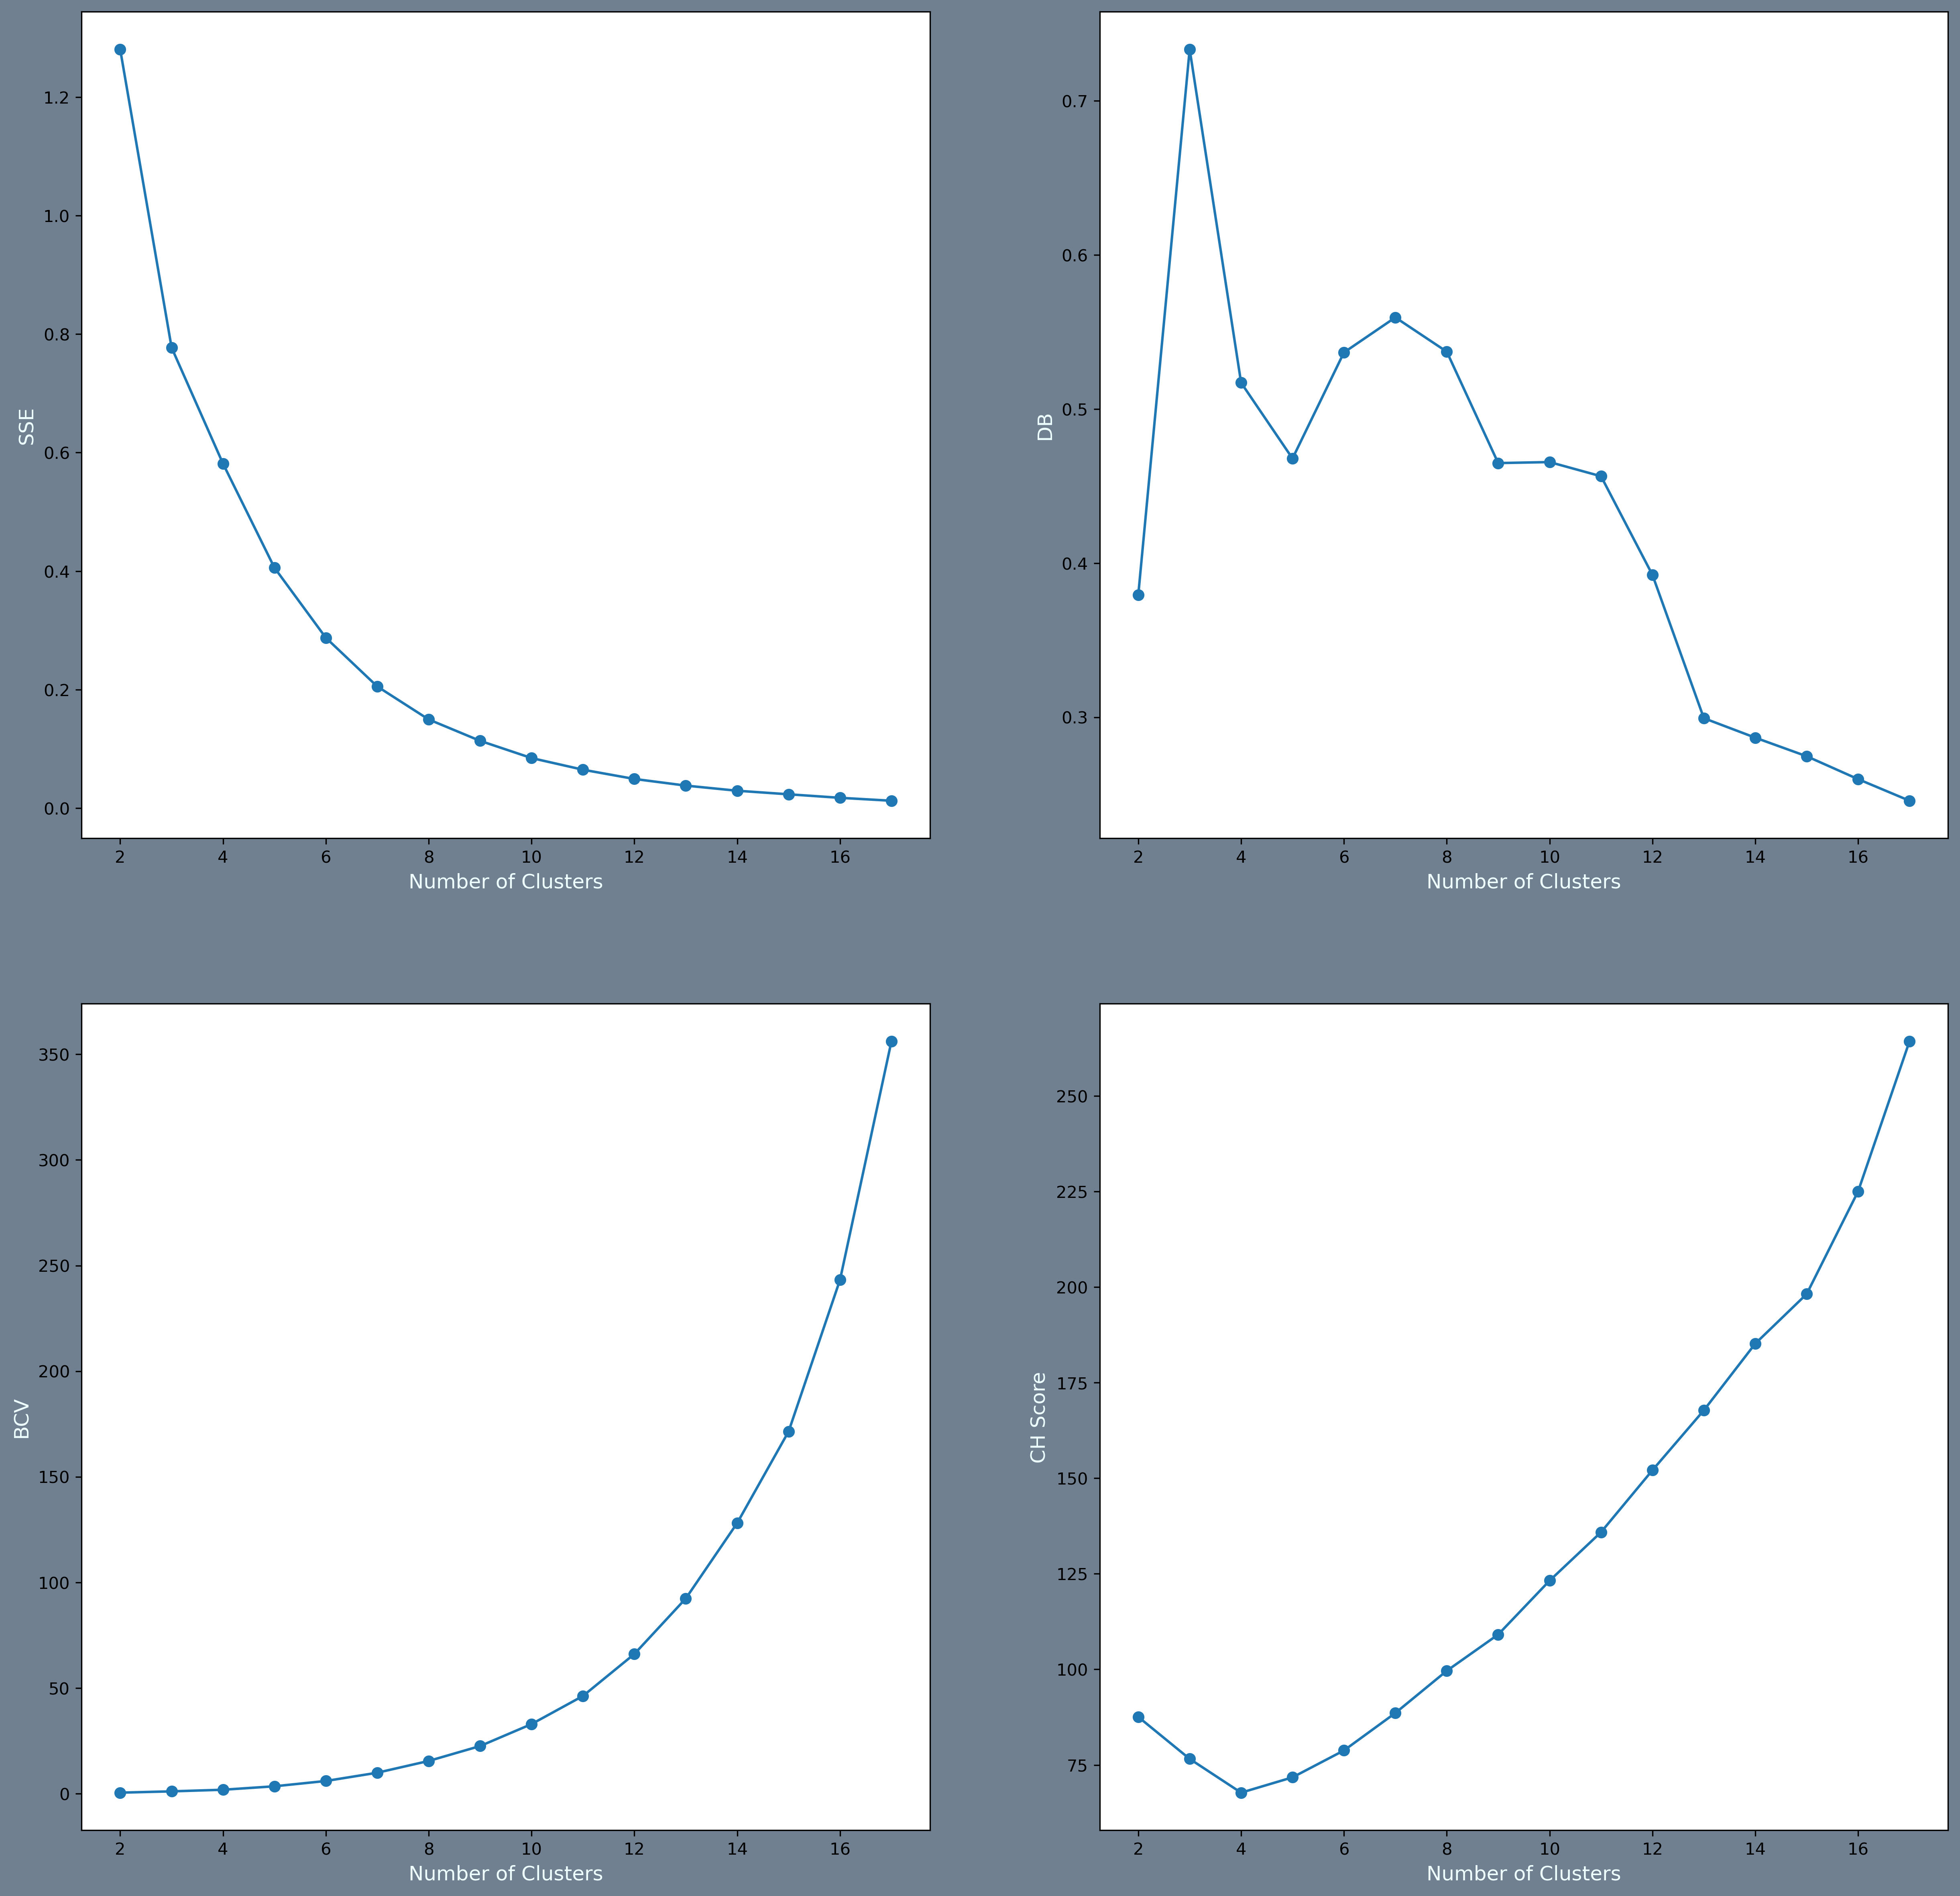

In [75]:
fig = plt.figure(figsize= (20,20),dpi=300)
fig.set_facecolor('slategray')

ax = fig.add_subplot(2, 2, 1)
ax.plot(list(sse.keys()), list(sse.values()), marker='o')
ax.set_xlabel('Number of Clusters', c = 'azure', size =12)
ax.set_ylabel('SSE', c = 'azure', size =12)


ax = fig.add_subplot(2, 2, 2)
ax.plot(list(db.keys()), list(db.values()), marker='o')
ax.set_xlabel('Number of Clusters', c = 'azure', size =12)
ax.set_ylabel('DB', c = 'azure', size =12)

'''
ax = fig.add_subplot(2, 2, 3)
ax.plot(list(slc.keys()), list(slc.values()), marker='o')
ax.set_xlabel('Number of Clusters', c = 'azure', size =12)
ax.set_ylabel('Silhouette Score', c = 'azure', size =12)
'''

ax = fig.add_subplot(2, 2, 3)
ax.plot(list(Ra.keys()), list(Ra.values()), marker='o')
ax.set_xlabel('Number of Clusters', c = 'azure', size =12)
ax.set_ylabel('BCV', c = 'azure', size =12)


ax = fig.add_subplot(2, 2, 4)
ax.plot(list(ch.keys()), list(ch.values()), marker='o')
ax.set_xlabel('Number of Clusters', c = 'azure', size =12)
ax.set_ylabel('CH Score', c = 'azure', size =12)



plt.savefig('cluster_validate.png')
plt.show()


In [ ]:
a = np.array((1, 2, 3))
b = np.array((1, 1, 1))
dist = np.linalg.norm(a-b)
print(dist)

In [ ]:
centroids

In [ ]:
centroids[0]

In [ ]:
np.mean(centroids,axis=0)

In [ ]:
   ax = fig.add_subplot(1, 2, 1, projection='3d')

    #fig = plt.figure(figsize=(5, 5))
    ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],color ='r',edgecolor="k", s = 50)


    ax.set_facecolor('slategray')
    #ax.grid(False)
    ax.tick_params(direction='out',colors='mistyrose',labelsize = 8, grid_alpha=0.8 , pad = 0.1)
    ax.view_init(30, 45)

    ax.set_xlabel(D1, c = 'azure', size =12)
    ax.xaxis.labelpad=1
    ax.set_ylabel(D2, c = 'azure', size =12)
    ax.yaxis.labelpad=1
    ax.set_zlabel(D3, c = 'azure', size =12)
    ax.zaxis.labelpad=1
    ax.dist = 9
    ax.set_title("Unclustered Data")  
    